data analysis

In [1]:
# required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.plotly as py
import seaborn as sns

In [2]:
# reading data of 100 kb resolution interchromosomal contacts
raw_data = pd.read_table(
    './data/GM12878_primary_interchromosomal/100kb_resolution_interchromosomal/chr1_chr2/MAPQGE30/chr1_2_100kb.RAWobserved', header=None)

KRnorm_vector_1 = pd.read_table(
    './data/GM12878_primary_interchromosomal/100kb_resolution_interchromosomal/chr1_chr2/MAPQGE30/chr1_100kb.KRnorm', header=None)
KRnorm_vector_2 = pd.read_table(
    './data/GM12878_primary_interchromosomal/100kb_resolution_interchromosomal/chr1_chr2/MAPQGE30/chr2_100kb.KRnorm', header=None)

SQRTVCnorm_vector_1 = pd.read_table(
    './data/GM12878_primary_interchromosomal/100kb_resolution_interchromosomal/chr1_chr2/MAPQGE30/chr1_100kb.SQRTVCnorm', header=None)
SQRTVCnorm_vector_2 = pd.read_table(
    './data/GM12878_primary_interchromosomal/100kb_resolution_interchromosomal/chr1_chr2/MAPQGE30/chr2_100kb.SQRTVCnorm', header=None)

VCnorm_vector_1 = pd.read_table(
    './data/GM12878_primary_interchromosomal/100kb_resolution_interchromosomal/chr1_chr2/MAPQGE30/chr1_100kb.VCnorm', header=None)
VCnorm_vector_2 = pd.read_table(
    './data/GM12878_primary_interchromosomal/100kb_resolution_interchromosomal/chr1_chr2/MAPQGE30/chr2_100kb.VCnorm', header=None)




In [3]:
# function that creates normalized dataset from raw_dataset
def normalize(raw_data, norm_vector_1, norm_vector_2, resolution):
    # raw_data format = ['coord1', 'coord2', 'value']
    # norm_vector_i format = ['coef']
    # resolution = integer, ex. 100kb -> 100000, 5kb -> 5000
    norm_data_temp = raw_data.copy() # temporary dataset for normalization
    norm_data_temp['coord1'] = (raw_data['coord1']/resolution)+1
    norm_data_temp['coord2'] = (raw_data['coord2']/resolution)+1
    
    # access to normalization coefficients
    norm_data_temp.insert(1, 'coord1_coef', [norm_vector_1.coef.iloc[int(i)] for i in norm_data_temp.coord1])
    norm_data_temp.insert(3, 'coord2_coef', [norm_vector_2.coef.iloc[int(i)] for i in norm_data_temp.coord2])
    
    norm_data_temp.insert(5, 'norm_value', norm_data_temp.value/(norm_data_temp.coord1_coef*norm_data_temp.coord2_coef))
    norm_data = raw_data[['coord1', 'coord2']]
    norm_data.insert(2, 'value', norm_data_temp.norm_value)
    return norm_data


    

In [4]:
# rename columns
raw_data.columns = ['coord1', 'coord2', 'value']

In [5]:
# rename column of normalization vector
KRnorm_vector_1.rename(columns={0:'coef'}, inplace=True)
KRnorm_vector_2.rename(columns={0:'coef'}, inplace=True)

SQRTVCnorm_vector_1.rename(columns={0:'coef'}, inplace=True)
SQRTVCnorm_vector_2.rename(columns={0:'coef'}, inplace=True)

VCnorm_vector_1.rename(columns={0:'coef'}, inplace=True)
VCnorm_vector_2.rename(columns={0:'coef'}, inplace=True)

In [6]:
KRnorm_data = normalize(raw_data, KRnorm_vector_1, KRnorm_vector_2, 100000)
SQRTVCnorm_data = normalize(raw_data, SQRTVCnorm_vector_1, SQRTVCnorm_vector_2, 100000)
VCnorm_data = normalize(raw_data, VCnorm_vector_1, VCnorm_vector_2, 100000)


In [ ]:
plt.hist(raw_data.value, raw_data.ID)
plt.axis([0, 100, 0, 100000])
plt.xlabel('Value')
plt.ylabel('Frequency?')
plt.title('Raw_data')
plt.show()
#plt.figure(figsize=(10, 30))

In [10]:
# function that returns subset by evaluated cut-off according defining percentage
def find_cutoff(data, percent):
    
    ### dataset = raw dataset with i,j,Mij named 'coord1','coord2','value' ###
    ### percent = 1 = 1%, 5 = 5% and etc ###
    #data.columns = ['coord1', 'coord2', 'value']
    counts = data['value'].value_counts().to_dict()
    count_data = pd.DataFrame(list(counts.items()), columns = ['value', 'frequency'])
    #print(count_data.head())
    sorted_count_data = count_data.sort_values(by=['frequency'])
    sort_data = sorted_count_data.sort_values(by=['value'], ascending=False)
    #print(sort_data)
    
    
    data_matrix = np.matrix(sort_data)
    number_of_contacts = len(data)
    #print(number_of_contacts)
    #print(number_of_contacts)
    percentage = round(number_of_contacts*(percent/100))
    #print(percentage)
    freq_sum = 0
    
    for element in data_matrix:
        #print(element[0,1])
        freq_sum += element[0,1]
        #print(freq_sum)
        if freq_sum >= percentage:
            return data[data.value >= element[0,0]]

In [9]:
#find_cutoff(raw_data, 1)
raw_subset = find_cutoff(raw_data, 1)
KRnorm_subset = find_cutoff(KRnorm_data, 1)
SQRTVCnorm_subset = find_cutoff(SQRTVCnorm_data, 1)
VCnorm_subset = find_cutoff(VCnorm_data, 1)



   value  frequency
0    1.0    1569424
1    2.0     708036
2    3.0     301517
3    4.0     135399
4    5.0      65159
     value  frequency
60   713.0          1
61   534.0          1
59   533.0          1
62   510.0          1
64   435.0          1
81   410.0          1
80   392.0          1
79   271.0          1
78   249.0          1
77   242.0          1
76   184.0          1
75   167.0          1
74   153.0          1
73   132.0          1
72   122.0          1
71   118.0          1
70   115.0          1
69   114.0          1
58   102.0          2
68   101.0          1
67    96.0          1
66    95.0          1
65    94.0          1
82    93.0          1
83    91.0          1
84    87.0          1
94    84.0          1
101   82.0          1
100   80.0          1
56    76.0          2
..     ...        ...
31    30.0         16
29    29.0         19
26    28.0         22
27    27.0         21
25    26.0         24
24    25.0         29
23    24.0         39
22    23.0         43


1.0
867.0
1.0
868.0
1.0
869.0
1.0
870.0
1.0
871.0
1.0
872.0
1.0
873.0
1.0
874.0
1.0
875.0
1.0
876.0
1.0
877.0
1.0
878.0
1.0
879.0
1.0
880.0
1.0
881.0
1.0
882.0
1.0
883.0
1.0
884.0
1.0
885.0
1.0
886.0
1.0
887.0
1.0
888.0
1.0
889.0
1.0
890.0
1.0
891.0
1.0
892.0
1.0
893.0
1.0
894.0
1.0
895.0
1.0
896.0
1.0
897.0
1.0
898.0
1.0
899.0
1.0
900.0
1.0
901.0
1.0
902.0
1.0
903.0
1.0
904.0
1.0
905.0
1.0
906.0
1.0
907.0
1.0
908.0
1.0
909.0
1.0
910.0
1.0
911.0
1.0
912.0
1.0
913.0
1.0
914.0
1.0
915.0
1.0
916.0
1.0
917.0
1.0
918.0
1.0
919.0
1.0
920.0
1.0
921.0
1.0
922.0
1.0
923.0
1.0
924.0
1.0
925.0
1.0
926.0
1.0
927.0
1.0
928.0
1.0
929.0
1.0
930.0
1.0
931.0
1.0
932.0
1.0
933.0
1.0
934.0
1.0
935.0
1.0
936.0
1.0
937.0
1.0
938.0
1.0
939.0
1.0
940.0
1.0
941.0
1.0
942.0
1.0
943.0
1.0
944.0
1.0
945.0
1.0
946.0
1.0
947.0
1.0
948.0
1.0
949.0
1.0
950.0
1.0
951.0
1.0
952.0
1.0
953.0
1.0
954.0
1.0
955.0
1.0
956.0
1.0
957.0
1.0
958.0
1.0
959.0
1.0
960.0
1.0
961.0
1.0
962.0
1.0
963.0
1.0
964.0
1.0
965.0
1.0
966.0


2366.0
1.0
2367.0
1.0
2368.0
1.0
2369.0
1.0
2370.0
1.0
2371.0
1.0
2372.0
1.0
2373.0
1.0
2374.0
1.0
2375.0
1.0
2376.0
1.0
2377.0
1.0
2378.0
1.0
2379.0
1.0
2380.0
1.0
2381.0
1.0
2382.0
1.0
2383.0
1.0
2384.0
1.0
2385.0
1.0
2386.0
1.0
2387.0
1.0
2388.0
1.0
2389.0
1.0
2390.0
1.0
2391.0
1.0
2392.0
1.0
2393.0
1.0
2394.0
1.0
2395.0
1.0
2396.0
1.0
2397.0
1.0
2398.0
1.0
2399.0
1.0
2400.0
1.0
2401.0
1.0
2402.0
1.0
2403.0
1.0
2404.0
1.0
2405.0
1.0
2406.0
1.0
2407.0
1.0
2408.0
1.0
2409.0
1.0
2410.0
1.0
2411.0
1.0
2412.0
1.0
2413.0
1.0
2414.0
1.0
2415.0
1.0
2416.0
1.0
2417.0
1.0
2418.0
1.0
2419.0
1.0
2420.0
1.0
2421.0
1.0
2422.0
1.0
2423.0
1.0
2424.0
1.0
2425.0
1.0
2426.0
1.0
2427.0
1.0
2428.0
1.0
2429.0
1.0
2430.0
1.0
2431.0
1.0
2432.0
1.0
2433.0
1.0
2434.0
1.0
2435.0
1.0
2436.0
1.0
2437.0
1.0
2438.0
1.0
2439.0
1.0
2440.0
1.0
2441.0
1.0
2442.0
1.0
2443.0
1.0
2444.0
1.0
2445.0
1.0
2446.0
1.0
2447.0
1.0
2448.0
1.0
2449.0
1.0
2450.0
1.0
2451.0
1.0
2452.0
1.0
2453.0
1.0
2454.0
1.0
2455.0
1.0
2456.0
1.0

1.0
3300.0
1.0
3301.0
1.0
3302.0
1.0
3303.0
1.0
3304.0
1.0
3305.0
1.0
3306.0
1.0
3307.0
1.0
3308.0
1.0
3309.0
1.0
3310.0
1.0
3311.0
1.0
3312.0
1.0
3313.0
1.0
3314.0
1.0
3315.0
1.0
3316.0
1.0
3317.0
1.0
3318.0
1.0
3319.0
1.0
3320.0
1.0
3321.0
1.0
3322.0
1.0
3323.0
1.0
3324.0
1.0
3325.0
1.0
3326.0
1.0
3327.0
1.0
3328.0
1.0
3329.0
1.0
3330.0
1.0
3331.0
1.0
3332.0
1.0
3333.0
1.0
3334.0
1.0
3335.0
1.0
3336.0
1.0
3337.0
1.0
3338.0
1.0
3339.0
1.0
3340.0
1.0
3341.0
1.0
3342.0
1.0
3343.0
1.0
3344.0
1.0
3345.0
1.0
3346.0
1.0
3347.0
1.0
3348.0
1.0
3349.0
1.0
3350.0
1.0
3351.0
1.0
3352.0
1.0
3353.0
1.0
3354.0
1.0
3355.0
1.0
3356.0
1.0
3357.0
1.0
3358.0
1.0
3359.0
1.0
3360.0
1.0
3361.0
1.0
3362.0
1.0
3363.0
1.0
3364.0
1.0
3365.0
1.0
3366.0
1.0
3367.0
1.0
3368.0
1.0
3369.0
1.0
3370.0
1.0
3371.0
1.0
3372.0
1.0
3373.0
1.0
3374.0
1.0
3375.0
1.0
3376.0
1.0
3377.0
1.0
3378.0
1.0
3379.0
1.0
3380.0
1.0
3381.0
1.0
3382.0
1.0
3383.0
1.0
3384.0
1.0
3385.0
1.0
3386.0
1.0
3387.0
1.0
3388.0
1.0
3389.0
1.0
3390.0

1.0
4116.0
1.0
4117.0
1.0
4118.0
1.0
4119.0
1.0
4120.0
1.0
4121.0
1.0
4122.0
1.0
4123.0
1.0
4124.0
1.0
4125.0
1.0
4126.0
1.0
4127.0
1.0
4128.0
1.0
4129.0
1.0
4130.0
1.0
4131.0
1.0
4132.0
1.0
4133.0
1.0
4134.0
1.0
4135.0
1.0
4136.0
1.0
4137.0
1.0
4138.0
1.0
4139.0
1.0
4140.0
1.0
4141.0
1.0
4142.0
1.0
4143.0
1.0
4144.0
1.0
4145.0
1.0
4146.0
1.0
4147.0
1.0
4148.0
1.0
4149.0
1.0
4150.0
1.0
4151.0
1.0
4152.0
1.0
4153.0
1.0
4154.0
1.0
4155.0
1.0
4156.0
1.0
4157.0
1.0
4158.0
1.0
4159.0
1.0
4160.0
1.0
4161.0
1.0
4162.0
1.0
4163.0
1.0
4164.0
1.0
4165.0
1.0
4166.0
1.0
4167.0
1.0
4168.0
1.0
4169.0
1.0
4170.0
1.0
4171.0
1.0
4172.0
1.0
4173.0
1.0
4174.0
1.0
4175.0
1.0
4176.0
1.0
4177.0
1.0
4178.0
1.0
4179.0
1.0
4180.0
1.0
4181.0
1.0
4182.0
1.0
4183.0
1.0
4184.0
1.0
4185.0
1.0
4186.0
1.0
4187.0
1.0
4188.0
1.0
4189.0
1.0
4190.0
1.0
4191.0
1.0
4192.0
1.0
4193.0
1.0
4194.0
1.0
4195.0
1.0
4196.0
1.0
4197.0
1.0
4198.0
1.0
4199.0
1.0
4200.0
1.0
4201.0
1.0
4202.0
1.0
4203.0
1.0
4204.0
1.0
4205.0
1.0
4206.0

1.0
5116.0
1.0
5117.0
1.0
5118.0
1.0
5119.0
1.0
5120.0
1.0
5121.0
1.0
5122.0
1.0
5123.0
1.0
5124.0
1.0
5125.0
1.0
5126.0
1.0
5127.0
1.0
5128.0
1.0
5129.0
1.0
5130.0
1.0
5131.0
1.0
5132.0
1.0
5133.0
1.0
5134.0
1.0
5135.0
1.0
5136.0
1.0
5137.0
1.0
5138.0
1.0
5139.0
1.0
5140.0
1.0
5141.0
1.0
5142.0
1.0
5143.0
1.0
5144.0
1.0
5145.0
1.0
5146.0
1.0
5147.0
1.0
5148.0
1.0
5149.0
1.0
5150.0
1.0
5151.0
1.0
5152.0
1.0
5153.0
1.0
5154.0
1.0
5155.0
1.0
5156.0
1.0
5157.0
1.0
5158.0
1.0
5159.0
1.0
5160.0
1.0
5161.0
1.0
5162.0
1.0
5163.0
1.0
5164.0
1.0
5165.0
1.0
5166.0
1.0
5167.0
1.0
5168.0
1.0
5169.0
1.0
5170.0
1.0
5171.0
1.0
5172.0
1.0
5173.0
1.0
5174.0
1.0
5175.0
1.0
5176.0
1.0
5177.0
1.0
5178.0
1.0
5179.0
1.0
5180.0
1.0
5181.0
1.0
5182.0
1.0
5183.0
1.0
5184.0
1.0
5185.0
1.0
5186.0
1.0
5187.0
1.0
5188.0
1.0
5189.0
1.0
5190.0
1.0
5191.0
1.0
5192.0
1.0
5193.0
1.0
5194.0
1.0
5195.0
1.0
5196.0
1.0
5197.0
1.0
5198.0
1.0
5199.0
1.0
5200.0
1.0
5201.0
1.0
5202.0
1.0
5203.0
1.0
5204.0
1.0
5205.0
1.0
5206.0

1.0
5943.0
1.0
5944.0
1.0
5945.0
1.0
5946.0
1.0
5947.0
1.0
5948.0
1.0
5949.0
1.0
5950.0
1.0
5951.0
1.0
5952.0
1.0
5953.0
1.0
5954.0
1.0
5955.0
1.0
5956.0
1.0
5957.0
1.0
5958.0
1.0
5959.0
1.0
5960.0
1.0
5961.0
1.0
5962.0
1.0
5963.0
1.0
5964.0
1.0
5965.0
1.0
5966.0
1.0
5967.0
1.0
5968.0
1.0
5969.0
1.0
5970.0
1.0
5971.0
1.0
5972.0
1.0
5973.0
1.0
5974.0
1.0
5975.0
1.0
5976.0
1.0
5977.0
1.0
5978.0
1.0
5979.0
1.0
5980.0
1.0
5981.0
1.0
5982.0
1.0
5983.0
1.0
5984.0
1.0
5985.0
1.0
5986.0
1.0
5987.0
1.0
5988.0
1.0
5989.0
1.0
5990.0
1.0
5991.0
1.0
5992.0
1.0
5993.0
1.0
5994.0
1.0
5995.0
1.0
5996.0
1.0
5997.0
1.0
5998.0
1.0
5999.0
1.0
6000.0
1.0
6001.0
1.0
6002.0
1.0
6003.0
1.0
6004.0
1.0
6005.0
1.0
6006.0
1.0
6007.0
1.0
6008.0
1.0
6009.0
1.0
6010.0
1.0
6011.0
1.0
6012.0
1.0
6013.0
1.0
6014.0
1.0
6015.0
1.0
6016.0
1.0
6017.0
1.0
6018.0
1.0
6019.0
1.0
6020.0
1.0
6021.0
1.0
6022.0
1.0
6023.0
1.0
6024.0
1.0
6025.0
1.0
6026.0
1.0
6027.0
1.0
6028.0
1.0
6029.0
1.0
6030.0
1.0
6031.0
1.0
6032.0
1.0
6033.0

6865.0
1.0
6866.0
1.0
6867.0
1.0
6868.0
1.0
6869.0
1.0
6870.0
1.0
6871.0
1.0
6872.0
1.0
6873.0
1.0
6874.0
1.0
6875.0
1.0
6876.0
1.0
6877.0
1.0
6878.0
1.0
6879.0
1.0
6880.0
1.0
6881.0
1.0
6882.0
1.0
6883.0
1.0
6884.0
1.0
6885.0
1.0
6886.0
1.0
6887.0
1.0
6888.0
1.0
6889.0
1.0
6890.0
1.0
6891.0
1.0
6892.0
1.0
6893.0
1.0
6894.0
1.0
6895.0
1.0
6896.0
1.0
6897.0
1.0
6898.0
1.0
6899.0
1.0
6900.0
1.0
6901.0
1.0
6902.0
1.0
6903.0
1.0
6904.0
1.0
6905.0
1.0
6906.0
1.0
6907.0
1.0
6908.0
1.0
6909.0
1.0
6910.0
1.0
6911.0
1.0
6912.0
1.0
6913.0
1.0
6914.0
1.0
6915.0
1.0
6916.0
1.0
6917.0
1.0
6918.0
1.0
6919.0
1.0
6920.0
1.0
6921.0
1.0
6922.0
1.0
6923.0
1.0
6924.0
1.0
6925.0
1.0
6926.0
1.0
6927.0
1.0
6928.0
1.0
6929.0
1.0
6930.0
1.0
6931.0
1.0
6932.0
1.0
6933.0
1.0
6934.0
1.0
6935.0
1.0
6936.0
1.0
6937.0
1.0
6938.0
1.0
6939.0
1.0
6940.0
1.0
6941.0
1.0
6942.0
1.0
6943.0
1.0
6944.0
1.0
6945.0
1.0
6946.0
1.0
6947.0
1.0
6948.0
1.0
6949.0
1.0
6950.0
1.0
6951.0
1.0
6952.0
1.0
6953.0
1.0
6954.0
1.0
6955.0
1.0

1.0
7865.0
1.0
7866.0
1.0
7867.0
1.0
7868.0
1.0
7869.0
1.0
7870.0
1.0
7871.0
1.0
7872.0
1.0
7873.0
1.0
7874.0
1.0
7875.0
1.0
7876.0
1.0
7877.0
1.0
7878.0
1.0
7879.0
1.0
7880.0
1.0
7881.0
1.0
7882.0
1.0
7883.0
1.0
7884.0
1.0
7885.0
1.0
7886.0
1.0
7887.0
1.0
7888.0
1.0
7889.0
1.0
7890.0
1.0
7891.0
1.0
7892.0
1.0
7893.0
1.0
7894.0
1.0
7895.0
1.0
7896.0
1.0
7897.0
1.0
7898.0
1.0
7899.0
1.0
7900.0
1.0
7901.0
1.0
7902.0
1.0
7903.0
1.0
7904.0
1.0
7905.0
1.0
7906.0
1.0
7907.0
1.0
7908.0
1.0
7909.0
1.0
7910.0
1.0
7911.0
1.0
7912.0
1.0
7913.0
1.0
7914.0
1.0
7915.0
1.0
7916.0
1.0
7917.0
1.0
7918.0
1.0
7919.0
1.0
7920.0
1.0
7921.0
1.0
7922.0
1.0
7923.0
1.0
7924.0
1.0
7925.0
1.0
7926.0
1.0
7927.0
1.0
7928.0
1.0
7929.0
1.0
7930.0
1.0
7931.0
1.0
7932.0
1.0
7933.0
1.0
7934.0
1.0
7935.0
1.0
7936.0
1.0
7937.0
1.0
7938.0
1.0
7939.0
1.0
7940.0
1.0
7941.0
1.0
7942.0
1.0
7943.0
1.0
7944.0
1.0
7945.0
1.0
7946.0
1.0
7947.0
1.0
7948.0
1.0
7949.0
1.0
7950.0
1.0
7951.0
1.0
7952.0
1.0
7953.0
1.0
7954.0
1.0
7955.0

1.0
8865.0
1.0
8866.0
1.0
8867.0
1.0
8868.0
1.0
8869.0
1.0
8870.0
1.0
8871.0
1.0
8872.0
1.0
8873.0
1.0
8874.0
1.0
8875.0
1.0
8876.0
1.0
8877.0
1.0
8878.0
1.0
8879.0
1.0
8880.0
1.0
8881.0
1.0
8882.0
1.0
8883.0
1.0
8884.0
1.0
8885.0
1.0
8886.0
1.0
8887.0
1.0
8888.0
1.0
8889.0
1.0
8890.0
1.0
8891.0
1.0
8892.0
1.0
8893.0
1.0
8894.0
1.0
8895.0
1.0
8896.0
1.0
8897.0
1.0
8898.0
1.0
8899.0
1.0
8900.0
1.0
8901.0
1.0
8902.0
1.0
8903.0
1.0
8904.0
1.0
8905.0
1.0
8906.0
1.0
8907.0
1.0
8908.0
1.0
8909.0
1.0
8910.0
1.0
8911.0
1.0
8912.0
1.0
8913.0
1.0
8914.0
1.0
8915.0
1.0
8916.0
1.0
8917.0
1.0
8918.0
1.0
8919.0
1.0
8920.0
1.0
8921.0
1.0
8922.0
1.0
8923.0
1.0
8924.0
1.0
8925.0
1.0
8926.0
1.0
8927.0
1.0
8928.0
1.0
8929.0
1.0
8930.0
1.0
8931.0
1.0
8932.0
1.0
8933.0
1.0
8934.0
1.0
8935.0
1.0
8936.0
1.0
8937.0
1.0
8938.0
1.0
8939.0
1.0
8940.0
1.0
8941.0
1.0
8942.0
1.0
8943.0
1.0
8944.0
1.0
8945.0
1.0
8946.0
1.0
8947.0
1.0
8948.0
1.0
8949.0
1.0
8950.0
1.0
8951.0
1.0
8952.0
1.0
8953.0
1.0
8954.0
1.0
8955.0

9864.0
1.0
9865.0
1.0
9866.0
1.0
9867.0
1.0
9868.0
1.0
9869.0
1.0
9870.0
1.0
9871.0
1.0
9872.0
1.0
9873.0
1.0
9874.0
1.0
9875.0
1.0
9876.0
1.0
9877.0
1.0
9878.0
1.0
9879.0
1.0
9880.0
1.0
9881.0
1.0
9882.0
1.0
9883.0
1.0
9884.0
1.0
9885.0
1.0
9886.0
1.0
9887.0
1.0
9888.0
1.0
9889.0
1.0
9890.0
1.0
9891.0
1.0
9892.0
1.0
9893.0
1.0
9894.0
1.0
9895.0
1.0
9896.0
1.0
9897.0
1.0
9898.0
1.0
9899.0
1.0
9900.0
1.0
9901.0
1.0
9902.0
1.0
9903.0
1.0
9904.0
1.0
9905.0
1.0
9906.0
1.0
9907.0
1.0
9908.0
1.0
9909.0
1.0
9910.0
1.0
9911.0
1.0
9912.0
1.0
9913.0
1.0
9914.0
1.0
9915.0
1.0
9916.0
1.0
9917.0
1.0
9918.0
1.0
9919.0
1.0
9920.0
1.0
9921.0
1.0
9922.0
1.0
9923.0
1.0
9924.0
1.0
9925.0
1.0
9926.0
1.0
9927.0
1.0
9928.0
1.0
9929.0
1.0
9930.0
1.0
9931.0
1.0
9932.0
1.0
9933.0
1.0
9934.0
1.0
9935.0
1.0
9936.0
1.0
9937.0
1.0
9938.0
1.0
9939.0
1.0
9940.0
1.0
9941.0
1.0
9942.0
1.0
9943.0
1.0
9944.0
1.0
9945.0
1.0
9946.0
1.0
9947.0
1.0
9948.0
1.0
9949.0
1.0
9950.0
1.0
9951.0
1.0
9952.0
1.0
9953.0
1.0
9954.0
1.0

10850.0
1.0
10851.0
1.0
10852.0
1.0
10853.0
1.0
10854.0
1.0
10855.0
1.0
10856.0
1.0
10857.0
1.0
10858.0
1.0
10859.0
1.0
10860.0
1.0
10861.0
1.0
10862.0
1.0
10863.0
1.0
10864.0
1.0
10865.0
1.0
10866.0
1.0
10867.0
1.0
10868.0
1.0
10869.0
1.0
10870.0
1.0
10871.0
1.0
10872.0
1.0
10873.0
1.0
10874.0
1.0
10875.0
1.0
10876.0
1.0
10877.0
1.0
10878.0
1.0
10879.0
1.0
10880.0
1.0
10881.0
1.0
10882.0
1.0
10883.0
1.0
10884.0
1.0
10885.0
1.0
10886.0
1.0
10887.0
1.0
10888.0
1.0
10889.0
1.0
10890.0
1.0
10891.0
1.0
10892.0
1.0
10893.0
1.0
10894.0
1.0
10895.0
1.0
10896.0
1.0
10897.0
1.0
10898.0
1.0
10899.0
1.0
10900.0
1.0
10901.0
1.0
10902.0
1.0
10903.0
1.0
10904.0
1.0
10905.0
1.0
10906.0
1.0
10907.0
1.0
10908.0
1.0
10909.0
1.0
10910.0
1.0
10911.0
1.0
10912.0
1.0
10913.0
1.0
10914.0
1.0
10915.0
1.0
10916.0
1.0
10917.0
1.0
10918.0
1.0
10919.0
1.0
10920.0
1.0
10921.0
1.0
10922.0
1.0
10923.0
1.0
10924.0
1.0
10925.0
1.0
10926.0
1.0
10927.0
1.0
10928.0
1.0
10929.0
1.0
10930.0
1.0
10931.0
1.0
10932.0
1.0
1093

1.0
11614.0
1.0
11615.0
1.0
11616.0
1.0
11617.0
1.0
11618.0
1.0
11619.0
1.0
11620.0
1.0
11621.0
1.0
11622.0
1.0
11623.0
1.0
11624.0
1.0
11625.0
1.0
11626.0
1.0
11627.0
1.0
11628.0
1.0
11629.0
1.0
11630.0
1.0
11631.0
1.0
11632.0
1.0
11633.0
1.0
11634.0
1.0
11635.0
1.0
11636.0
1.0
11637.0
1.0
11638.0
1.0
11639.0
1.0
11640.0
1.0
11641.0
1.0
11642.0
1.0
11643.0
1.0
11644.0
1.0
11645.0
1.0
11646.0
1.0
11647.0
1.0
11648.0
1.0
11649.0
1.0
11650.0
1.0
11651.0
1.0
11652.0
1.0
11653.0
1.0
11654.0
1.0
11655.0
1.0
11656.0
1.0
11657.0
1.0
11658.0
1.0
11659.0
1.0
11660.0
1.0
11661.0
1.0
11662.0
1.0
11663.0
1.0
11664.0
1.0
11665.0
1.0
11666.0
1.0
11667.0
1.0
11668.0
1.0
11669.0
1.0
11670.0
1.0
11671.0
1.0
11672.0
1.0
11673.0
1.0
11674.0
1.0
11675.0
1.0
11676.0
1.0
11677.0
1.0
11678.0
1.0
11679.0
1.0
11680.0
1.0
11681.0
1.0
11682.0
1.0
11683.0
1.0
11684.0
1.0
11685.0
1.0
11686.0
1.0
11687.0
1.0
11688.0
1.0
11689.0
1.0
11690.0
1.0
11691.0
1.0
11692.0
1.0
11693.0
1.0
11694.0
1.0
11695.0
1.0
11696.0
1.0


1.0
12614.0
1.0
12615.0
1.0
12616.0
1.0
12617.0
1.0
12618.0
1.0
12619.0
1.0
12620.0
1.0
12621.0
1.0
12622.0
1.0
12623.0
1.0
12624.0
1.0
12625.0
1.0
12626.0
1.0
12627.0
1.0
12628.0
1.0
12629.0
1.0
12630.0
1.0
12631.0
1.0
12632.0
1.0
12633.0
1.0
12634.0
1.0
12635.0
1.0
12636.0
1.0
12637.0
1.0
12638.0
1.0
12639.0
1.0
12640.0
1.0
12641.0
1.0
12642.0
1.0
12643.0
1.0
12644.0
1.0
12645.0
1.0
12646.0
1.0
12647.0
1.0
12648.0
1.0
12649.0
1.0
12650.0
1.0
12651.0
1.0
12652.0
1.0
12653.0
1.0
12654.0
1.0
12655.0
1.0
12656.0
1.0
12657.0
1.0
12658.0
1.0
12659.0
1.0
12660.0
1.0
12661.0
1.0
12662.0
1.0
12663.0
1.0
12664.0
1.0
12665.0
1.0
12666.0
1.0
12667.0
1.0
12668.0
1.0
12669.0
1.0
12670.0
1.0
12671.0
1.0
12672.0
1.0
12673.0
1.0
12674.0
1.0
12675.0
1.0
12676.0
1.0
12677.0
1.0
12678.0
1.0
12679.0
1.0
12680.0
1.0
12681.0
1.0
12682.0
1.0
12683.0
1.0
12684.0
1.0
12685.0
1.0
12686.0
1.0
12687.0
1.0
12688.0
1.0
12689.0
1.0
12690.0
1.0
12691.0
1.0
12692.0
1.0
12693.0
1.0
12694.0
1.0
12695.0
1.0
12696.0
1.0


13613.0
1.0
13614.0
1.0
13615.0
1.0
13616.0
1.0
13617.0
1.0
13618.0
1.0
13619.0
1.0
13620.0
1.0
13621.0
1.0
13622.0
1.0
13623.0
1.0
13624.0
1.0
13625.0
1.0
13626.0
1.0
13627.0
1.0
13628.0
1.0
13629.0
1.0
13630.0
1.0
13631.0
1.0
13632.0
1.0
13633.0
1.0
13634.0
1.0
13635.0
1.0
13636.0
1.0
13637.0
1.0
13638.0
1.0
13639.0
1.0
13640.0
1.0
13641.0
1.0
13642.0
1.0
13643.0
1.0
13644.0
1.0
13645.0
1.0
13646.0
1.0
13647.0
1.0
13648.0
1.0
13649.0
1.0
13650.0
1.0
13651.0
1.0
13652.0
1.0
13653.0
1.0
13654.0
1.0
13655.0
1.0
13656.0
1.0
13657.0
1.0
13658.0
1.0
13659.0
1.0
13660.0
1.0
13661.0
1.0
13662.0
1.0
13663.0
1.0
13664.0
1.0
13665.0
1.0
13666.0
1.0
13667.0
1.0
13668.0
1.0
13669.0
1.0
13670.0
1.0
13671.0
1.0
13672.0
1.0
13673.0
1.0
13674.0
1.0
13675.0
1.0
13676.0
1.0
13677.0
1.0
13678.0
1.0
13679.0
1.0
13680.0
1.0
13681.0
1.0
13682.0
1.0
13683.0
1.0
13684.0
1.0
13685.0
1.0
13686.0
1.0
13687.0
1.0
13688.0
1.0
13689.0
1.0
13690.0
1.0
13691.0
1.0
13692.0
1.0
13693.0
1.0
13694.0
1.0
13695.0
1.0
1369

14613.0
1.0
14614.0
1.0
14615.0
1.0
14616.0
1.0
14617.0
1.0
14618.0
1.0
14619.0
1.0
14620.0
1.0
14621.0
1.0
14622.0
1.0
14623.0
1.0
14624.0
1.0
14625.0
1.0
14626.0
1.0
14627.0
1.0
14628.0
1.0
14629.0
1.0
14630.0
1.0
14631.0
1.0
14632.0
1.0
14633.0
1.0
14634.0
1.0
14635.0
1.0
14636.0
1.0
14637.0
1.0
14638.0
1.0
14639.0
1.0
14640.0
1.0
14641.0
1.0
14642.0
1.0
14643.0
1.0
14644.0
1.0
14645.0
1.0
14646.0
1.0
14647.0
1.0
14648.0
1.0
14649.0
1.0
14650.0
1.0
14651.0
1.0
14652.0
1.0
14653.0
1.0
14654.0
1.0
14655.0
1.0
14656.0
1.0
14657.0
1.0
14658.0
1.0
14659.0
1.0
14660.0
1.0
14661.0
1.0
14662.0
1.0
14663.0
1.0
14664.0
1.0
14665.0
1.0
14666.0
1.0
14667.0
1.0
14668.0
1.0
14669.0
1.0
14670.0
1.0
14671.0
1.0
14672.0
1.0
14673.0
1.0
14674.0
1.0
14675.0
1.0
14676.0
1.0
14677.0
1.0
14678.0
1.0
14679.0
1.0
14680.0
1.0
14681.0
1.0
14682.0
1.0
14683.0
1.0
14684.0
1.0
14685.0
1.0
14686.0
1.0
14687.0
1.0
14688.0
1.0
14689.0
1.0
14690.0
1.0
14691.0
1.0
14692.0
1.0
14693.0
1.0
14694.0
1.0
14695.0
1.0
1469

1.0
15613.0
1.0
15614.0
1.0
15615.0
1.0
15616.0
1.0
15617.0
1.0
15618.0
1.0
15619.0
1.0
15620.0
1.0
15621.0
1.0
15622.0
1.0
15623.0
1.0
15624.0
1.0
15625.0
1.0
15626.0
1.0
15627.0
1.0
15628.0
1.0
15629.0
1.0
15630.0
1.0
15631.0
1.0
15632.0
1.0
15633.0
1.0
15634.0
1.0
15635.0
1.0
15636.0
1.0
15637.0
1.0
15638.0
1.0
15639.0
1.0
15640.0
1.0
15641.0
1.0
15642.0
1.0
15643.0
1.0
15644.0
1.0
15645.0
1.0
15646.0
1.0
15647.0
1.0
15648.0
1.0
15649.0
1.0
15650.0
1.0
15651.0
1.0
15652.0
1.0
15653.0
1.0
15654.0
1.0
15655.0
1.0
15656.0
1.0
15657.0
1.0
15658.0
1.0
15659.0
1.0
15660.0
1.0
15661.0
1.0
15662.0
1.0
15663.0
1.0
15664.0
1.0
15665.0
1.0
15666.0
1.0
15667.0
1.0
15668.0
1.0
15669.0
1.0
15670.0
1.0
15671.0
1.0
15672.0
1.0
15673.0
1.0
15674.0
1.0
15675.0
1.0
15676.0
1.0
15677.0
1.0
15678.0
1.0
15679.0
1.0
15680.0
1.0
15681.0
1.0
15682.0
1.0
15683.0
1.0
15684.0
1.0
15685.0
1.0
15686.0
1.0
15687.0
1.0
15688.0
1.0
15689.0
1.0
15690.0
1.0
15691.0
1.0
15692.0
1.0
15693.0
1.0
15694.0
1.0
15695.0
1.0


1.0
16613.0
1.0
16614.0
1.0
16615.0
1.0
16616.0
1.0
16617.0
1.0
16618.0
1.0
16619.0
1.0
16620.0
1.0
16621.0
1.0
16622.0
1.0
16623.0
1.0
16624.0
1.0
16625.0
1.0
16626.0
1.0
16627.0
1.0
16628.0
1.0
16629.0
1.0
16630.0
1.0
16631.0
1.0
16632.0
1.0
16633.0
1.0
16634.0
1.0
16635.0
1.0
16636.0
1.0
16637.0
1.0
16638.0
1.0
16639.0
1.0
16640.0
1.0
16641.0
1.0
16642.0
1.0
16643.0
1.0
16644.0
1.0
16645.0
1.0
16646.0
1.0
16647.0
1.0
16648.0
1.0
16649.0
1.0
16650.0
1.0
16651.0
1.0
16652.0
1.0
16653.0
1.0
16654.0
1.0
16655.0
1.0
16656.0
1.0
16657.0
1.0
16658.0
1.0
16659.0
1.0
16660.0
1.0
16661.0
1.0
16662.0
1.0
16663.0
1.0
16664.0
1.0
16665.0
1.0
16666.0
1.0
16667.0
1.0
16668.0
1.0
16669.0
1.0
16670.0
1.0
16671.0
1.0
16672.0
1.0
16673.0
1.0
16674.0
1.0
16675.0
1.0
16676.0
1.0
16677.0
1.0
16678.0
1.0
16679.0
1.0
16680.0
1.0
16681.0
1.0
16682.0
1.0
16683.0
1.0
16684.0
1.0
16685.0
1.0
16686.0
1.0
16687.0
1.0
16688.0
1.0
16689.0
1.0
16690.0
1.0
16691.0
1.0
16692.0
1.0
16693.0
1.0
16694.0
1.0
16695.0
1.0


17612.0
1.0
17613.0
1.0
17614.0
1.0
17615.0
1.0
17616.0
1.0
17617.0
1.0
17618.0
1.0
17619.0
1.0
17620.0
1.0
17621.0
1.0
17622.0
1.0
17623.0
1.0
17624.0
1.0
17625.0
1.0
17626.0
1.0
17627.0
1.0
17628.0
1.0
17629.0
1.0
17630.0
1.0
17631.0
1.0
17632.0
1.0
17633.0
1.0
17634.0
1.0
17635.0
1.0
17636.0
1.0
17637.0
1.0
17638.0
1.0
17639.0
1.0
17640.0
1.0
17641.0
1.0
17642.0
1.0
17643.0
1.0
17644.0
1.0
17645.0
1.0
17646.0
1.0
17647.0
1.0
17648.0
1.0
17649.0
1.0
17650.0
1.0
17651.0
1.0
17652.0
1.0
17653.0
1.0
17654.0
1.0
17655.0
1.0
17656.0
1.0
17657.0
1.0
17658.0
1.0
17659.0
1.0
17660.0
1.0
17661.0
1.0
17662.0
1.0
17663.0
1.0
17664.0
1.0
17665.0
1.0
17666.0
1.0
17667.0
1.0
17668.0
1.0
17669.0
1.0
17670.0
1.0
17671.0
1.0
17672.0
1.0
17673.0
1.0
17674.0
1.0
17675.0
1.0
17676.0
1.0
17677.0
1.0
17678.0
1.0
17679.0
1.0
17680.0
1.0
17681.0
1.0
17682.0
1.0
17683.0
1.0
17684.0
1.0
17685.0
1.0
17686.0
1.0
17687.0
1.0
17688.0
1.0
17689.0
1.0
17690.0
1.0
17691.0
1.0
17692.0
1.0
17693.0
1.0
17694.0
1.0
1769

18612.0
1.0
18613.0
1.0
18614.0
1.0
18615.0
1.0
18616.0
1.0
18617.0
1.0
18618.0
1.0
18619.0
1.0
18620.0
1.0
18621.0
1.0
18622.0
1.0
18623.0
1.0
18624.0
1.0
18625.0
1.0
18626.0
1.0
18627.0
1.0
18628.0
1.0
18629.0
1.0
18630.0
1.0
18631.0
1.0
18632.0
1.0
18633.0
1.0
18634.0
1.0
18635.0
1.0
18636.0
1.0
18637.0
1.0
18638.0
1.0
18639.0
1.0
18640.0
1.0
18641.0
1.0
18642.0
1.0
18643.0
1.0
18644.0
1.0
18645.0
1.0
18646.0
1.0
18647.0
1.0
18648.0
1.0
18649.0
1.0
18650.0
1.0
18651.0
1.0
18652.0
1.0
18653.0
1.0
18654.0
1.0
18655.0
1.0
18656.0
1.0
18657.0
1.0
18658.0
1.0
18659.0
1.0
18660.0
1.0
18661.0
1.0
18662.0
1.0
18663.0
1.0
18664.0
1.0
18665.0
1.0
18666.0
1.0
18667.0
1.0
18668.0
1.0
18669.0
1.0
18670.0
1.0
18671.0
1.0
18672.0
1.0
18673.0
1.0
18674.0
1.0
18675.0
1.0
18676.0
1.0
18677.0
1.0
18678.0
1.0
18679.0
1.0
18680.0
1.0
18681.0
1.0
18682.0
1.0
18683.0
1.0
18684.0
1.0
18685.0
1.0
18686.0
1.0
18687.0
1.0
18688.0
1.0
18689.0
1.0
18690.0
1.0
18691.0
1.0
18692.0
1.0
18693.0
1.0
18694.0
1.0
1869

1.0
19612.0
1.0
19613.0
1.0
19614.0
1.0
19615.0
1.0
19616.0
1.0
19617.0
1.0
19618.0
1.0
19619.0
1.0
19620.0
1.0
19621.0
1.0
19622.0
1.0
19623.0
1.0
19624.0
1.0
19625.0
1.0
19626.0
1.0
19627.0
1.0
19628.0
1.0
19629.0
1.0
19630.0
1.0
19631.0
1.0
19632.0
1.0
19633.0
1.0
19634.0
1.0
19635.0
1.0
19636.0
1.0
19637.0
1.0
19638.0
1.0
19639.0
1.0
19640.0
1.0
19641.0
1.0
19642.0
1.0
19643.0
1.0
19644.0
1.0
19645.0
1.0
19646.0
1.0
19647.0
1.0
19648.0
1.0
19649.0
1.0
19650.0
1.0
19651.0
1.0
19652.0
1.0
19653.0
1.0
19654.0
1.0
19655.0
1.0
19656.0
1.0
19657.0
1.0
19658.0
1.0
19659.0
1.0
19660.0
1.0
19661.0
1.0
19662.0
1.0
19663.0
1.0
19664.0
1.0
19665.0
1.0
19666.0
1.0
19667.0
1.0
19668.0
1.0
19669.0
1.0
19670.0
1.0
19671.0
1.0
19672.0
1.0
19673.0
1.0
19674.0
1.0
19675.0
1.0
19676.0
1.0
19677.0
1.0
19678.0
1.0
19679.0
1.0
19680.0
1.0
19681.0
1.0
19682.0
1.0
19683.0
1.0
19684.0
1.0
19685.0
1.0
19686.0
1.0
19687.0
1.0
19688.0
1.0
19689.0
1.0
19690.0
1.0
19691.0
1.0
19692.0
1.0
19693.0
1.0
19694.0
1.0


1.0
20612.0
1.0
20613.0
1.0
20614.0
1.0
20615.0
1.0
20616.0
1.0
20617.0
1.0
20618.0
1.0
20619.0
1.0
20620.0
1.0
20621.0
1.0
20622.0
1.0
20623.0
1.0
20624.0
1.0
20625.0
1.0
20626.0
1.0
20627.0
1.0
20628.0
1.0
20629.0
1.0
20630.0
1.0
20631.0
1.0
20632.0
1.0
20633.0
1.0
20634.0
1.0
20635.0
1.0
20636.0
1.0
20637.0
1.0
20638.0
1.0
20639.0
1.0
20640.0
1.0
20641.0
1.0
20642.0
1.0
20643.0
1.0
20644.0
1.0
20645.0
1.0
20646.0
1.0
20647.0
1.0
20648.0
1.0
20649.0
1.0
20650.0
1.0
20651.0
1.0
20652.0
1.0
20653.0
1.0
20654.0
1.0
20655.0
1.0
20656.0
1.0
20657.0
1.0
20658.0
1.0
20659.0
1.0
20660.0
1.0
20661.0
1.0
20662.0
1.0
20663.0
1.0
20664.0
1.0
20665.0
1.0
20666.0
1.0
20667.0
1.0
20668.0
1.0
20669.0
1.0
20670.0
1.0
20671.0
1.0
20672.0
1.0
20673.0
1.0
20674.0
1.0
20675.0
1.0
20676.0
1.0
20677.0
1.0
20678.0
1.0
20679.0
1.0
20680.0
1.0
20681.0
1.0
20682.0
1.0
20683.0
1.0
20684.0
1.0
20685.0
1.0
20686.0
1.0
20687.0
1.0
20688.0
1.0
20689.0
1.0
20690.0
1.0
20691.0
1.0
20692.0
1.0
20693.0
1.0
20694.0
1.0


21611.0
1.0
21612.0
1.0
21613.0
1.0
21614.0
1.0
21615.0
1.0
21616.0
1.0
21617.0
1.0
21618.0
1.0
21619.0
1.0
21620.0
1.0
21621.0
1.0
21622.0
1.0
21623.0
1.0
21624.0
1.0
21625.0
1.0
21626.0
1.0
21627.0
1.0
21628.0
1.0
21629.0
1.0
21630.0
1.0
21631.0
1.0
21632.0
1.0
21633.0
1.0
21634.0
1.0
21635.0
1.0
21636.0
1.0
21637.0
1.0
21638.0
1.0
21639.0
1.0
21640.0
1.0
21641.0
1.0
21642.0
1.0
21643.0
1.0
21644.0
1.0
21645.0
1.0
21646.0
1.0
21647.0
1.0
21648.0
1.0
21649.0
1.0
21650.0
1.0
21651.0
1.0
21652.0
1.0
21653.0
1.0
21654.0
1.0
21655.0
1.0
21656.0
1.0
21657.0
1.0
21658.0
1.0
21659.0
1.0
21660.0
1.0
21661.0
1.0
21662.0
1.0
21663.0
1.0
21664.0
1.0
21665.0
1.0
21666.0
1.0
21667.0
1.0
21668.0
1.0
21669.0
1.0
21670.0
1.0
21671.0
1.0
21672.0
1.0
21673.0
1.0
21674.0
1.0
21675.0
1.0
21676.0
1.0
21677.0
1.0
21678.0
1.0
21679.0
1.0
21680.0
1.0
21681.0
1.0
21682.0
1.0
21683.0
1.0
21684.0
1.0
21685.0
1.0
21686.0
1.0
21687.0
1.0
21688.0
1.0
21689.0
1.0
21690.0
1.0
21691.0
1.0
21692.0
1.0
21693.0
1.0
2169

1.0
22584.0
1.0
22585.0
1.0
22586.0
1.0
22587.0
1.0
22588.0
1.0
22589.0
1.0
22590.0
1.0
22591.0
1.0
22592.0
1.0
22593.0
1.0
22594.0
1.0
22595.0
1.0
22596.0
1.0
22597.0
1.0
22598.0
1.0
22599.0
1.0
22600.0
1.0
22601.0
1.0
22602.0
1.0
22603.0
1.0
22604.0
1.0
22605.0
1.0
22606.0
1.0
22607.0
1.0
22608.0
1.0
22609.0
1.0
22610.0
1.0
22611.0
1.0
22612.0
1.0
22613.0
1.0
22614.0
1.0
22615.0
1.0
22616.0
1.0
22617.0
1.0
22618.0
1.0
22619.0
1.0
22620.0
1.0
22621.0
1.0
22622.0
1.0
22623.0
1.0
22624.0
1.0
22625.0
1.0
22626.0
1.0
22627.0
1.0
22628.0
1.0
22629.0
1.0
22630.0
1.0
22631.0
1.0
22632.0
1.0
22633.0
1.0
22634.0
1.0
22635.0
1.0
22636.0
1.0
22637.0
1.0
22638.0
1.0
22639.0
1.0
22640.0
1.0
22641.0
1.0
22642.0
1.0
22643.0
1.0
22644.0
1.0
22645.0
1.0
22646.0
1.0
22647.0
1.0
22648.0
1.0
22649.0
1.0
22650.0
1.0
22651.0
1.0
22652.0
1.0
22653.0
1.0
22654.0
1.0
22655.0
1.0
22656.0
1.0
22657.0
1.0
22658.0
1.0
22659.0
1.0
22660.0
1.0
22661.0
1.0
22662.0
1.0
22663.0
1.0
22664.0
1.0
22665.0
1.0
22666.0
1.0


1.0
23361.0
1.0
23362.0
1.0
23363.0
1.0
23364.0
1.0
23365.0
1.0
23366.0
1.0
23367.0
1.0
23368.0
1.0
23369.0
1.0
23370.0
1.0
23371.0
1.0
23372.0
1.0
23373.0
1.0
23374.0
1.0
23375.0
1.0
23376.0
1.0
23377.0
1.0
23378.0
1.0
23379.0
1.0
23380.0
1.0
23381.0
1.0
23382.0
1.0
23383.0
1.0
23384.0
1.0
23385.0
1.0
23386.0
1.0
23387.0
1.0
23388.0
1.0
23389.0
1.0
23390.0
1.0
23391.0
1.0
23392.0
1.0
23393.0
1.0
23394.0
1.0
23395.0
1.0
23396.0
1.0
23397.0
1.0
23398.0
1.0
23399.0
1.0
23400.0
1.0
23401.0
1.0
23402.0
1.0
23403.0
1.0
23404.0
1.0
23405.0
1.0
23406.0
1.0
23407.0
1.0
23408.0
1.0
23409.0
1.0
23410.0
1.0
23411.0
1.0
23412.0
1.0
23413.0
1.0
23414.0
1.0
23415.0
1.0
23416.0
1.0
23417.0
1.0
23418.0
1.0
23419.0
1.0
23420.0
1.0
23421.0
1.0
23422.0
1.0
23423.0
1.0
23424.0
1.0
23425.0
1.0
23426.0
1.0
23427.0
1.0
23428.0
1.0
23429.0
1.0
23430.0
1.0
23431.0
1.0
23432.0
1.0
23433.0
1.0
23434.0
1.0
23435.0
1.0
23436.0
1.0
23437.0
1.0
23438.0
1.0
23439.0
1.0
23440.0
1.0
23441.0
1.0
23442.0
1.0
23443.0
1.0


1.0
24361.0
1.0
24362.0
1.0
24363.0
1.0
24364.0
1.0
24365.0
1.0
24366.0
1.0
24367.0
1.0
24368.0
1.0
24369.0
1.0
24370.0
1.0
24371.0
1.0
24372.0
1.0
24373.0
1.0
24374.0
1.0
24375.0
1.0
24376.0
1.0
24377.0
1.0
24378.0
1.0
24379.0
1.0
24380.0
1.0
24381.0
1.0
24382.0
1.0
24383.0
1.0
24384.0
1.0
24385.0
1.0
24386.0
1.0
24387.0
1.0
24388.0
1.0
24389.0
1.0
24390.0
1.0
24391.0
1.0
24392.0
1.0
24393.0
1.0
24394.0
1.0
24395.0
1.0
24396.0
1.0
24397.0
1.0
24398.0
1.0
24399.0
1.0
24400.0
1.0
24401.0
1.0
24402.0
1.0
24403.0
1.0
24404.0
1.0
24405.0
1.0
24406.0
1.0
24407.0
1.0
24408.0
1.0
24409.0
1.0
24410.0
1.0
24411.0
1.0
24412.0
1.0
24413.0
1.0
24414.0
1.0
24415.0
1.0
24416.0
1.0
24417.0
1.0
24418.0
1.0
24419.0
1.0
24420.0
1.0
24421.0
1.0
24422.0
1.0
24423.0
1.0
24424.0
1.0
24425.0
1.0
24426.0
1.0
24427.0
1.0
24428.0
1.0
24429.0
1.0
24430.0
1.0
24431.0
1.0
24432.0
1.0
24433.0
1.0
24434.0
1.0
24435.0
1.0
24436.0
1.0
24437.0
1.0
24438.0
1.0
24439.0
1.0
24440.0
1.0
24441.0
1.0
24442.0
1.0
24443.0
1.0


25360.0
1.0
25361.0
1.0
25362.0
1.0
25363.0
1.0
25364.0
1.0
25365.0
1.0
25366.0
1.0
25367.0
1.0
25368.0
1.0
25369.0
1.0
25370.0
1.0
25371.0
1.0
25372.0
1.0
25373.0
1.0
25374.0
1.0
25375.0
1.0
25376.0
1.0
25377.0
1.0
25378.0
1.0
25379.0
1.0
25380.0
1.0
25381.0
1.0
25382.0
1.0
25383.0
1.0
25384.0
1.0
25385.0
1.0
25386.0
1.0
25387.0
1.0
25388.0
1.0
25389.0
1.0
25390.0
1.0
25391.0
1.0
25392.0
1.0
25393.0
1.0
25394.0
1.0
25395.0
1.0
25396.0
1.0
25397.0
1.0
25398.0
1.0
25399.0
1.0
25400.0
1.0
25401.0
1.0
25402.0
1.0
25403.0
1.0
25404.0
1.0
25405.0
1.0
25406.0
1.0
25407.0
1.0
25408.0
1.0
25409.0
1.0
25410.0
1.0
25411.0
1.0
25412.0
1.0
25413.0
1.0
25414.0
1.0
25415.0
1.0
25416.0
1.0
25417.0
1.0
25418.0
1.0
25419.0
1.0
25420.0
1.0
25421.0
1.0
25422.0
1.0
25423.0
1.0
25424.0
1.0
25425.0
1.0
25426.0
1.0
25427.0
1.0
25428.0
1.0
25429.0
1.0
25430.0
1.0
25431.0
1.0
25432.0
1.0
25433.0
1.0
25434.0
1.0
25435.0
1.0
25436.0
1.0
25437.0
1.0
25438.0
1.0
25439.0
1.0
25440.0
1.0
25441.0
1.0
25442.0
1.0
2544

26360.0
1.0
26361.0
1.0
26362.0
1.0
26363.0
1.0
26364.0
1.0
26365.0
1.0
26366.0
1.0
26367.0
1.0
26368.0
1.0
26369.0
1.0
26370.0
1.0
26371.0
1.0
26372.0
1.0
26373.0
1.0
26374.0
1.0
26375.0
1.0
26376.0
1.0
26377.0
1.0
26378.0
1.0
26379.0
1.0
26380.0
1.0
26381.0
1.0
26382.0
1.0
26383.0
1.0
26384.0
1.0
26385.0
1.0
26386.0
1.0
26387.0
1.0
26388.0
1.0
26389.0
1.0
26390.0
1.0
26391.0
1.0
26392.0
1.0
26393.0
1.0
26394.0
1.0
26395.0
1.0
26396.0
1.0
26397.0
1.0
26398.0
1.0
26399.0
1.0
26400.0
1.0
26401.0
1.0
26402.0
1.0
26403.0
1.0
26404.0
1.0
26405.0
1.0
26406.0
1.0
26407.0
1.0
26408.0
1.0
26409.0
1.0
26410.0
1.0
26411.0
1.0
26412.0
1.0
26413.0
1.0
26414.0
1.0
26415.0
1.0
26416.0
1.0
26417.0
1.0
26418.0
1.0
26419.0
1.0
26420.0
1.0
26421.0
1.0
26422.0
1.0
26423.0
1.0
26424.0
1.0
26425.0
1.0
26426.0
1.0
26427.0
1.0
26428.0
1.0
26429.0
1.0
26430.0
1.0
26431.0
1.0
26432.0
1.0
26433.0
1.0
26434.0
1.0
26435.0
1.0
26436.0
1.0
26437.0
1.0
26438.0
1.0
26439.0
1.0
26440.0
1.0
26441.0
1.0
26442.0
1.0
2644

1.0
27360.0
1.0
27361.0
1.0
27362.0
1.0
27363.0
1.0
27364.0
1.0
27365.0
1.0
27366.0
1.0
27367.0
1.0
27368.0
1.0
27369.0
1.0
27370.0
1.0
27371.0
1.0
27372.0
1.0
27373.0
1.0
27374.0
1.0
27375.0
1.0
27376.0
1.0
27377.0
1.0
27378.0
1.0
27379.0
1.0
27380.0
1.0
27381.0
1.0
27382.0
1.0
27383.0
1.0
27384.0
1.0
27385.0
1.0
27386.0
1.0
27387.0
1.0
27388.0
1.0
27389.0
1.0
27390.0
1.0
27391.0
1.0
27392.0
1.0
27393.0
1.0
27394.0
1.0
27395.0
1.0
27396.0
1.0
27397.0
1.0
27398.0
1.0
27399.0
1.0
27400.0
1.0
27401.0
1.0
27402.0
1.0
27403.0
1.0
27404.0
1.0
27405.0
1.0
27406.0
1.0
27407.0
1.0
27408.0
1.0
27409.0
1.0
27410.0
1.0
27411.0
1.0
27412.0
1.0
27413.0
1.0
27414.0
1.0
27415.0
1.0
27416.0
1.0
27417.0
1.0
27418.0
1.0
27419.0
1.0
27420.0
1.0
27421.0
1.0
27422.0
1.0
27423.0
1.0
27424.0
1.0
27425.0
1.0
27426.0
1.0
27427.0
1.0
27428.0
1.0
27429.0
1.0
27430.0
1.0
27431.0
1.0
27432.0
1.0
27433.0
1.0
27434.0
1.0
27435.0
1.0
27436.0
1.0
27437.0
1.0
27438.0
1.0
27439.0
1.0
27440.0
1.0
27441.0
1.0
27442.0
1.0


1.0
28360.0
1.0
28361.0
1.0
28362.0
1.0
28363.0
1.0
28364.0
1.0
28365.0
1.0
28366.0
1.0
28367.0
1.0
28368.0
1.0
28369.0
1.0
28370.0
1.0
28371.0
1.0
28372.0
1.0
28373.0
1.0
28374.0
1.0
28375.0
1.0
28376.0
1.0
28377.0
1.0
28378.0
1.0
28379.0
1.0
28380.0
1.0
28381.0
1.0
28382.0
1.0
28383.0
1.0
28384.0
1.0
28385.0
1.0
28386.0
1.0
28387.0
1.0
28388.0
1.0
28389.0
1.0
28390.0
1.0
28391.0
1.0
28392.0
1.0
28393.0
1.0
28394.0
1.0
28395.0
1.0
28396.0
1.0
28397.0
1.0
28398.0
1.0
28399.0
1.0
28400.0
1.0
28401.0
1.0
28402.0
1.0
28403.0
1.0
28404.0
1.0
28405.0
1.0
28406.0
1.0
28407.0
1.0
28408.0
1.0
28409.0
1.0
28410.0
1.0
28411.0
1.0
28412.0
1.0
28413.0
1.0
28414.0
1.0
28415.0
1.0
28416.0
1.0
28417.0
1.0
28418.0
1.0
28419.0
1.0
28420.0
1.0
28421.0
1.0
28422.0
1.0
28423.0
1.0
28424.0
1.0
28425.0
1.0
28426.0
1.0
28427.0
1.0
28428.0
1.0
28429.0
1.0
28430.0
1.0
28431.0
1.0
28432.0
1.0
28433.0
1.0
28434.0
1.0
28435.0
1.0
28436.0
1.0
28437.0
1.0
28438.0
1.0
28439.0
1.0
28440.0
1.0
28441.0
1.0
28442.0
1.0


6075.0
1.0
6076.0
1.0
6077.0
1.0
6078.0
1.0
6079.0
1.0
6080.0
1.0
6081.0
1.0
6082.0
1.0
6083.0
1.0
6084.0
1.0
6085.0
1.0
6086.0
1.0
6087.0
1.0
6088.0
1.0
6089.0
1.0
6090.0
1.0
6091.0
1.0
6092.0
1.0
6093.0
1.0
6094.0
1.0
6095.0
1.0
6096.0
1.0
6097.0
1.0
6098.0
1.0
6099.0
1.0
6100.0
1.0
6101.0
1.0
6102.0
1.0
6103.0
1.0
6104.0
1.0
6105.0
1.0
6106.0
1.0
6107.0
1.0
6108.0
1.0
6109.0
1.0
6110.0
1.0
6111.0
1.0
6112.0
1.0
6113.0
1.0
6114.0
1.0
6115.0
1.0
6116.0
1.0
6117.0
1.0
6118.0
1.0
6119.0
1.0
6120.0
1.0
6121.0
1.0
6122.0
1.0
6123.0
1.0
6124.0
1.0
6125.0
1.0
6126.0
1.0
6127.0
1.0
6128.0
1.0
6129.0
1.0
6130.0
1.0
6131.0
1.0
6132.0
1.0
6133.0
1.0
6134.0
1.0
6135.0
1.0
6136.0
1.0
6137.0
1.0
6138.0
1.0
6139.0
1.0
6140.0
1.0
6141.0
1.0
6142.0
1.0
6143.0
1.0
6144.0
1.0
6145.0
1.0
6146.0
1.0
6147.0
1.0
6148.0
1.0
6149.0
1.0
6150.0
1.0
6151.0
1.0
6152.0
1.0
6153.0
1.0
6154.0
1.0
6155.0
1.0
6156.0
1.0
6157.0
1.0
6158.0
1.0
6159.0
1.0
6160.0
1.0
6161.0
1.0
6162.0
1.0
6163.0
1.0
6164.0
1.0
6165.0
1.0

6827.0
1.0
6828.0
1.0
6829.0
1.0
6830.0
1.0
6831.0
1.0
6832.0
1.0
6833.0
1.0
6834.0
1.0
6835.0
1.0
6836.0
1.0
6837.0
1.0
6838.0
1.0
6839.0
1.0
6840.0
1.0
6841.0
1.0
6842.0
1.0
6843.0
1.0
6844.0
1.0
6845.0
1.0
6846.0
1.0
6847.0
1.0
6848.0
1.0
6849.0
1.0
6850.0
1.0
6851.0
1.0
6852.0
1.0
6853.0
1.0
6854.0
1.0
6855.0
1.0
6856.0
1.0
6857.0
1.0
6858.0
1.0
6859.0
1.0
6860.0
1.0
6861.0
1.0
6862.0
1.0
6863.0
1.0
6864.0
1.0
6865.0
1.0
6866.0
1.0
6867.0
1.0
6868.0
1.0
6869.0
1.0
6870.0
1.0
6871.0
1.0
6872.0
1.0
6873.0
1.0
6874.0
1.0
6875.0
1.0
6876.0
1.0
6877.0
1.0
6878.0
1.0
6879.0
1.0
6880.0
1.0
6881.0
1.0
6882.0
1.0
6883.0
1.0
6884.0
1.0
6885.0
1.0
6886.0
1.0
6887.0
1.0
6888.0
1.0
6889.0
1.0
6890.0
1.0
6891.0
1.0
6892.0
1.0
6893.0
1.0
6894.0
1.0
6895.0
1.0
6896.0
1.0
6897.0
1.0
6898.0
1.0
6899.0
1.0
6900.0
1.0
6901.0
1.0
6902.0
1.0
6903.0
1.0
6904.0
1.0
6905.0
1.0
6906.0
1.0
6907.0
1.0
6908.0
1.0
6909.0
1.0
6910.0
1.0
6911.0
1.0
6912.0
1.0
6913.0
1.0
6914.0
1.0
6915.0
1.0
6916.0
1.0
6917.0
1.0

7644.0
1.0
7645.0
1.0
7646.0
1.0
7647.0
1.0
7648.0
1.0
7649.0
1.0
7650.0
1.0
7651.0
1.0
7652.0
1.0
7653.0
1.0
7654.0
1.0
7655.0
1.0
7656.0
1.0
7657.0
1.0
7658.0
1.0
7659.0
1.0
7660.0
1.0
7661.0
1.0
7662.0
1.0
7663.0
1.0
7664.0
1.0
7665.0
1.0
7666.0
1.0
7667.0
1.0
7668.0
1.0
7669.0
1.0
7670.0
1.0
7671.0
1.0
7672.0
1.0
7673.0
1.0
7674.0
1.0
7675.0
1.0
7676.0
1.0
7677.0
1.0
7678.0
1.0
7679.0
1.0
7680.0
1.0
7681.0
1.0
7682.0
1.0
7683.0
1.0
7684.0
1.0
7685.0
1.0
7686.0
1.0
7687.0
1.0
7688.0
1.0
7689.0
1.0
7690.0
1.0
7691.0
1.0
7692.0
1.0
7693.0
1.0
7694.0
1.0
7695.0
1.0
7696.0
1.0
7697.0
1.0
7698.0
1.0
7699.0
1.0
7700.0
1.0
7701.0
1.0
7702.0
1.0
7703.0
1.0
7704.0
1.0
7705.0
1.0
7706.0
1.0
7707.0
1.0
7708.0
1.0
7709.0
1.0
7710.0
1.0
7711.0
1.0
7712.0
1.0
7713.0
1.0
7714.0
1.0
7715.0
1.0
7716.0
1.0
7717.0
1.0
7718.0
1.0
7719.0
1.0
7720.0
1.0
7721.0
1.0
7722.0
1.0
7723.0
1.0
7724.0
1.0
7725.0
1.0
7726.0
1.0
7727.0
1.0
7728.0
1.0
7729.0
1.0
7730.0
1.0
7731.0
1.0
7732.0
1.0
7733.0
1.0
7734.0
1.0

1.0
8578.0
1.0
8579.0
1.0
8580.0
1.0
8581.0
1.0
8582.0
1.0
8583.0
1.0
8584.0
1.0
8585.0
1.0
8586.0
1.0
8587.0
1.0
8588.0
1.0
8589.0
1.0
8590.0
1.0
8591.0
1.0
8592.0
1.0
8593.0
1.0
8594.0
1.0
8595.0
1.0
8596.0
1.0
8597.0
1.0
8598.0
1.0
8599.0
1.0
8600.0
1.0
8601.0
1.0
8602.0
1.0
8603.0
1.0
8604.0
1.0
8605.0
1.0
8606.0
1.0
8607.0
1.0
8608.0
1.0
8609.0
1.0
8610.0
1.0
8611.0
1.0
8612.0
1.0
8613.0
1.0
8614.0
1.0
8615.0
1.0
8616.0
1.0
8617.0
1.0
8618.0
1.0
8619.0
1.0
8620.0
1.0
8621.0
1.0
8622.0
1.0
8623.0
1.0
8624.0
1.0
8625.0
1.0
8626.0
1.0
8627.0
1.0
8628.0
1.0
8629.0
1.0
8630.0
1.0
8631.0
1.0
8632.0
1.0
8633.0
1.0
8634.0
1.0
8635.0
1.0
8636.0
1.0
8637.0
1.0
8638.0
1.0
8639.0
1.0
8640.0
1.0
8641.0
1.0
8642.0
1.0
8643.0
1.0
8644.0
1.0
8645.0
1.0
8646.0
1.0
8647.0
1.0
8648.0
1.0
8649.0
1.0
8650.0
1.0
8651.0
1.0
8652.0
1.0
8653.0
1.0
8654.0
1.0
8655.0
1.0
8656.0
1.0
8657.0
1.0
8658.0
1.0
8659.0
1.0
8660.0
1.0
8661.0
1.0
8662.0
1.0
8663.0
1.0
8664.0
1.0
8665.0
1.0
8666.0
1.0
8667.0
1.0
8668.0

9580.0
1.0
9581.0
1.0
9582.0
1.0
9583.0
1.0
9584.0
1.0
9585.0
1.0
9586.0
1.0
9587.0
1.0
9588.0
1.0
9589.0
1.0
9590.0
1.0
9591.0
1.0
9592.0
1.0
9593.0
1.0
9594.0
1.0
9595.0
1.0
9596.0
1.0
9597.0
1.0
9598.0
1.0
9599.0
1.0
9600.0
1.0
9601.0
1.0
9602.0
1.0
9603.0
1.0
9604.0
1.0
9605.0
1.0
9606.0
1.0
9607.0
1.0
9608.0
1.0
9609.0
1.0
9610.0
1.0
9611.0
1.0
9612.0
1.0
9613.0
1.0
9614.0
1.0
9615.0
1.0
9616.0
1.0
9617.0
1.0
9618.0
1.0
9619.0
1.0
9620.0
1.0
9621.0
1.0
9622.0
1.0
9623.0
1.0
9624.0
1.0
9625.0
1.0
9626.0
1.0
9627.0
1.0
9628.0
1.0
9629.0
1.0
9630.0
1.0
9631.0
1.0
9632.0
1.0
9633.0
1.0
9634.0
1.0
9635.0
1.0
9636.0
1.0
9637.0
1.0
9638.0
1.0
9639.0
1.0
9640.0
1.0
9641.0
1.0
9642.0
1.0
9643.0
1.0
9644.0
1.0
9645.0
1.0
9646.0
1.0
9647.0
1.0
9648.0
1.0
9649.0
1.0
9650.0
1.0
9651.0
1.0
9652.0
1.0
9653.0
1.0
9654.0
1.0
9655.0
1.0
9656.0
1.0
9657.0
1.0
9658.0
1.0
9659.0
1.0
9660.0
1.0
9661.0
1.0
9662.0
1.0
9663.0
1.0
9664.0
1.0
9665.0
1.0
9666.0
1.0
9667.0
1.0
9668.0
1.0
9669.0
1.0
9670.0
1.0

10581.0
1.0
10582.0
1.0
10583.0
1.0
10584.0
1.0
10585.0
1.0
10586.0
1.0
10587.0
1.0
10588.0
1.0
10589.0
1.0
10590.0
1.0
10591.0
1.0
10592.0
1.0
10593.0
1.0
10594.0
1.0
10595.0
1.0
10596.0
1.0
10597.0
1.0
10598.0
1.0
10599.0
1.0
10600.0
1.0
10601.0
1.0
10602.0
1.0
10603.0
1.0
10604.0
1.0
10605.0
1.0
10606.0
1.0
10607.0
1.0
10608.0
1.0
10609.0
1.0
10610.0
1.0
10611.0
1.0
10612.0
1.0
10613.0
1.0
10614.0
1.0
10615.0
1.0
10616.0
1.0
10617.0
1.0
10618.0
1.0
10619.0
1.0
10620.0
1.0
10621.0
1.0
10622.0
1.0
10623.0
1.0
10624.0
1.0
10625.0
1.0
10626.0
1.0
10627.0
1.0
10628.0
1.0
10629.0
1.0
10630.0
1.0
10631.0
1.0
10632.0
1.0
10633.0
1.0
10634.0
1.0
10635.0
1.0
10636.0
1.0
10637.0
1.0
10638.0
1.0
10639.0
1.0
10640.0
1.0
10641.0
1.0
10642.0
1.0
10643.0
1.0
10644.0
1.0
10645.0
1.0
10646.0
1.0
10647.0
1.0
10648.0
1.0
10649.0
1.0
10650.0
1.0
10651.0
1.0
10652.0
1.0
10653.0
1.0
10654.0
1.0
10655.0
1.0
10656.0
1.0
10657.0
1.0
10658.0
1.0
10659.0
1.0
10660.0
1.0
10661.0
1.0
10662.0
1.0
10663.0
1.0
1066

1.0
11583.0
1.0
11584.0
1.0
11585.0
1.0
11586.0
1.0
11587.0
1.0
11588.0
1.0
11589.0
1.0
11590.0
1.0
11591.0
1.0
11592.0
1.0
11593.0
1.0
11594.0
1.0
11595.0
1.0
11596.0
1.0
11597.0
1.0
11598.0
1.0
11599.0
1.0
11600.0
1.0
11601.0
1.0
11602.0
1.0
11603.0
1.0
11604.0
1.0
11605.0
1.0
11606.0
1.0
11607.0
1.0
11608.0
1.0
11609.0
1.0
11610.0
1.0
11611.0
1.0
11612.0
1.0
11613.0
1.0
11614.0
1.0
11615.0
1.0
11616.0
1.0
11617.0
1.0
11618.0
1.0
11619.0
1.0
11620.0
1.0
11621.0
1.0
11622.0
1.0
11623.0
1.0
11624.0
1.0
11625.0
1.0
11626.0
1.0
11627.0
1.0
11628.0
1.0
11629.0
1.0
11630.0
1.0
11631.0
1.0
11632.0
1.0
11633.0
1.0
11634.0
1.0
11635.0
1.0
11636.0
1.0
11637.0
1.0
11638.0
1.0
11639.0
1.0
11640.0
1.0
11641.0
1.0
11642.0
1.0
11643.0
1.0
11644.0
1.0
11645.0
1.0
11646.0
1.0
11647.0
1.0
11648.0
1.0
11649.0
1.0
11650.0
1.0
11651.0
1.0
11652.0
1.0
11653.0
1.0
11654.0
1.0
11655.0
1.0
11656.0
1.0
11657.0
1.0
11658.0
1.0
11659.0
1.0
11660.0
1.0
11661.0
1.0
11662.0
1.0
11663.0
1.0
11664.0
1.0
11665.0
1.0


1.0
12585.0
1.0
12586.0
1.0
12587.0
1.0
12588.0
1.0
12589.0
1.0
12590.0
1.0
12591.0
1.0
12592.0
1.0
12593.0
1.0
12594.0
1.0
12595.0
1.0
12596.0
1.0
12597.0
1.0
12598.0
1.0
12599.0
1.0
12600.0
1.0
12601.0
1.0
12602.0
1.0
12603.0
1.0
12604.0
1.0
12605.0
1.0
12606.0
1.0
12607.0
1.0
12608.0
1.0
12609.0
1.0
12610.0
1.0
12611.0
2.0
12613.0
1.0
12614.0
1.0
12615.0
1.0
12616.0
1.0
12617.0
1.0
12618.0
1.0
12619.0
1.0
12620.0
1.0
12621.0
1.0
12622.0
1.0
12623.0
1.0
12624.0
1.0
12625.0
1.0
12626.0
1.0
12627.0
1.0
12628.0
1.0
12629.0
1.0
12630.0
1.0
12631.0
1.0
12632.0
1.0
12633.0
1.0
12634.0
1.0
12635.0
1.0
12636.0
1.0
12637.0
1.0
12638.0
1.0
12639.0
1.0
12640.0
1.0
12641.0
1.0
12642.0
1.0
12643.0
1.0
12644.0
1.0
12645.0
1.0
12646.0
1.0
12647.0
1.0
12648.0
1.0
12649.0
1.0
12650.0
1.0
12651.0
1.0
12652.0
1.0
12653.0
1.0
12654.0
1.0
12655.0
1.0
12656.0
1.0
12657.0
1.0
12658.0
1.0
12659.0
1.0
12660.0
1.0
12661.0
1.0
12662.0
1.0
12663.0
1.0
12664.0
1.0
12665.0
1.0
12666.0
1.0
12667.0
1.0
12668.0
1.0


13586.0
1.0
13587.0
1.0
13588.0
1.0
13589.0
1.0
13590.0
1.0
13591.0
1.0
13592.0
1.0
13593.0
1.0
13594.0
1.0
13595.0
1.0
13596.0
1.0
13597.0
1.0
13598.0
1.0
13599.0
1.0
13600.0
1.0
13601.0
1.0
13602.0
1.0
13603.0
1.0
13604.0
1.0
13605.0
1.0
13606.0
1.0
13607.0
1.0
13608.0
1.0
13609.0
1.0
13610.0
1.0
13611.0
1.0
13612.0
1.0
13613.0
1.0
13614.0
1.0
13615.0
1.0
13616.0
1.0
13617.0
1.0
13618.0
1.0
13619.0
1.0
13620.0
1.0
13621.0
1.0
13622.0
1.0
13623.0
1.0
13624.0
1.0
13625.0
1.0
13626.0
1.0
13627.0
1.0
13628.0
1.0
13629.0
1.0
13630.0
1.0
13631.0
1.0
13632.0
1.0
13633.0
1.0
13634.0
1.0
13635.0
1.0
13636.0
1.0
13637.0
1.0
13638.0
1.0
13639.0
1.0
13640.0
1.0
13641.0
1.0
13642.0
1.0
13643.0
1.0
13644.0
1.0
13645.0
1.0
13646.0
1.0
13647.0
1.0
13648.0
1.0
13649.0
1.0
13650.0
1.0
13651.0
1.0
13652.0
1.0
13653.0
1.0
13654.0
1.0
13655.0
1.0
13656.0
1.0
13657.0
1.0
13658.0
1.0
13659.0
1.0
13660.0
1.0
13661.0
1.0
13662.0
1.0
13663.0
1.0
13664.0
1.0
13665.0
1.0
13666.0
1.0
13667.0
1.0
13668.0
1.0
1366

14587.0
1.0
14588.0
1.0
14589.0
1.0
14590.0
1.0
14591.0
1.0
14592.0
1.0
14593.0
1.0
14594.0
1.0
14595.0
1.0
14596.0
1.0
14597.0
1.0
14598.0
1.0
14599.0
1.0
14600.0
1.0
14601.0
1.0
14602.0
1.0
14603.0
1.0
14604.0
1.0
14605.0
1.0
14606.0
1.0
14607.0
1.0
14608.0
1.0
14609.0
1.0
14610.0
1.0
14611.0
1.0
14612.0
1.0
14613.0
1.0
14614.0
1.0
14615.0
1.0
14616.0
1.0
14617.0
1.0
14618.0
1.0
14619.0
1.0
14620.0
1.0
14621.0
1.0
14622.0
1.0
14623.0
1.0
14624.0
1.0
14625.0
1.0
14626.0
1.0
14627.0
1.0
14628.0
1.0
14629.0
1.0
14630.0
1.0
14631.0
1.0
14632.0
1.0
14633.0
1.0
14634.0
1.0
14635.0
1.0
14636.0
1.0
14637.0
1.0
14638.0
1.0
14639.0
1.0
14640.0
1.0
14641.0
1.0
14642.0
1.0
14643.0
1.0
14644.0
1.0
14645.0
1.0
14646.0
1.0
14647.0
1.0
14648.0
1.0
14649.0
1.0
14650.0
1.0
14651.0
1.0
14652.0
1.0
14653.0
1.0
14654.0
1.0
14655.0
1.0
14656.0
1.0
14657.0
1.0
14658.0
1.0
14659.0
1.0
14660.0
1.0
14661.0
1.0
14662.0
1.0
14663.0
1.0
14664.0
1.0
14665.0
1.0
14666.0
1.0
14667.0
1.0
14668.0
1.0
14669.0
1.0
1467

1.0
15589.0
1.0
15590.0
1.0
15591.0
1.0
15592.0
1.0
15593.0
1.0
15594.0
1.0
15595.0
1.0
15596.0
1.0
15597.0
1.0
15598.0
1.0
15599.0
1.0
15600.0
1.0
15601.0
1.0
15602.0
1.0
15603.0
1.0
15604.0
1.0
15605.0
1.0
15606.0
1.0
15607.0
1.0
15608.0
1.0
15609.0
1.0
15610.0
1.0
15611.0
1.0
15612.0
1.0
15613.0
1.0
15614.0
1.0
15615.0
1.0
15616.0
1.0
15617.0
1.0
15618.0
1.0
15619.0
1.0
15620.0
1.0
15621.0
1.0
15622.0
1.0
15623.0
1.0
15624.0
1.0
15625.0
1.0
15626.0
1.0
15627.0
1.0
15628.0
1.0
15629.0
1.0
15630.0
1.0
15631.0
1.0
15632.0
1.0
15633.0
1.0
15634.0
1.0
15635.0
1.0
15636.0
1.0
15637.0
1.0
15638.0
1.0
15639.0
1.0
15640.0
1.0
15641.0
1.0
15642.0
1.0
15643.0
1.0
15644.0
1.0
15645.0
1.0
15646.0
1.0
15647.0
1.0
15648.0
1.0
15649.0
1.0
15650.0
1.0
15651.0
1.0
15652.0
1.0
15653.0
1.0
15654.0
1.0
15655.0
1.0
15656.0
1.0
15657.0
1.0
15658.0
1.0
15659.0
1.0
15660.0
2.0
15662.0
1.0
15663.0
1.0
15664.0
1.0
15665.0
1.0
15666.0
1.0
15667.0
1.0
15668.0
1.0
15669.0
1.0
15670.0
1.0
15671.0
1.0
15672.0
1.0


1.0
16592.0
1.0
16593.0
1.0
16594.0
1.0
16595.0
1.0
16596.0
1.0
16597.0
1.0
16598.0
1.0
16599.0
1.0
16600.0
1.0
16601.0
1.0
16602.0
1.0
16603.0
1.0
16604.0
1.0
16605.0
1.0
16606.0
1.0
16607.0
1.0
16608.0
1.0
16609.0
1.0
16610.0
1.0
16611.0
1.0
16612.0
1.0
16613.0
1.0
16614.0
1.0
16615.0
1.0
16616.0
1.0
16617.0
1.0
16618.0
1.0
16619.0
1.0
16620.0
1.0
16621.0
1.0
16622.0
1.0
16623.0
1.0
16624.0
1.0
16625.0
1.0
16626.0
1.0
16627.0
1.0
16628.0
1.0
16629.0
1.0
16630.0
1.0
16631.0
1.0
16632.0
1.0
16633.0
1.0
16634.0
1.0
16635.0
1.0
16636.0
1.0
16637.0
1.0
16638.0
1.0
16639.0
1.0
16640.0
1.0
16641.0
1.0
16642.0
1.0
16643.0
1.0
16644.0
1.0
16645.0
1.0
16646.0
1.0
16647.0
1.0
16648.0
1.0
16649.0
1.0
16650.0
1.0
16651.0
1.0
16652.0
1.0
16653.0
1.0
16654.0
1.0
16655.0
1.0
16656.0
1.0
16657.0
1.0
16658.0
1.0
16659.0
1.0
16660.0
1.0
16661.0
1.0
16662.0
1.0
16663.0
1.0
16664.0
1.0
16665.0
1.0
16666.0
1.0
16667.0
1.0
16668.0
1.0
16669.0
1.0
16670.0
1.0
16671.0
1.0
16672.0
1.0
16673.0
1.0
16674.0
1.0


17592.0
1.0
17593.0
1.0
17594.0
1.0
17595.0
1.0
17596.0
1.0
17597.0
1.0
17598.0
1.0
17599.0
1.0
17600.0
1.0
17601.0
1.0
17602.0
1.0
17603.0
1.0
17604.0
1.0
17605.0
1.0
17606.0
1.0
17607.0
1.0
17608.0
1.0
17609.0
1.0
17610.0
1.0
17611.0
1.0
17612.0
1.0
17613.0
1.0
17614.0
1.0
17615.0
1.0
17616.0
1.0
17617.0
1.0
17618.0
1.0
17619.0
1.0
17620.0
1.0
17621.0
1.0
17622.0
1.0
17623.0
1.0
17624.0
1.0
17625.0
1.0
17626.0
1.0
17627.0
1.0
17628.0
1.0
17629.0
1.0
17630.0
1.0
17631.0
1.0
17632.0
1.0
17633.0
1.0
17634.0
1.0
17635.0
1.0
17636.0
1.0
17637.0
1.0
17638.0
1.0
17639.0
1.0
17640.0
1.0
17641.0
1.0
17642.0
1.0
17643.0
1.0
17644.0
1.0
17645.0
1.0
17646.0
1.0
17647.0
1.0
17648.0
1.0
17649.0
1.0
17650.0
1.0
17651.0
1.0
17652.0
1.0
17653.0
1.0
17654.0
1.0
17655.0
1.0
17656.0
1.0
17657.0
1.0
17658.0
1.0
17659.0
1.0
17660.0
1.0
17661.0
1.0
17662.0
1.0
17663.0
1.0
17664.0
1.0
17665.0
1.0
17666.0
1.0
17667.0
1.0
17668.0
1.0
17669.0
1.0
17670.0
1.0
17671.0
1.0
17672.0
1.0
17673.0
1.0
17674.0
1.0
1767

18595.0
1.0
18596.0
1.0
18597.0
1.0
18598.0
1.0
18599.0
1.0
18600.0
1.0
18601.0
1.0
18602.0
1.0
18603.0
1.0
18604.0
1.0
18605.0
1.0
18606.0
1.0
18607.0
1.0
18608.0
1.0
18609.0
1.0
18610.0
1.0
18611.0
1.0
18612.0
1.0
18613.0
1.0
18614.0
1.0
18615.0
1.0
18616.0
1.0
18617.0
1.0
18618.0
1.0
18619.0
1.0
18620.0
1.0
18621.0
1.0
18622.0
1.0
18623.0
1.0
18624.0
1.0
18625.0
1.0
18626.0
1.0
18627.0
1.0
18628.0
1.0
18629.0
1.0
18630.0
1.0
18631.0
1.0
18632.0
1.0
18633.0
1.0
18634.0
1.0
18635.0
1.0
18636.0
1.0
18637.0
1.0
18638.0
1.0
18639.0
1.0
18640.0
1.0
18641.0
1.0
18642.0
1.0
18643.0
1.0
18644.0
1.0
18645.0
1.0
18646.0
1.0
18647.0
1.0
18648.0
1.0
18649.0
1.0
18650.0
1.0
18651.0
1.0
18652.0
1.0
18653.0
1.0
18654.0
1.0
18655.0
1.0
18656.0
1.0
18657.0
1.0
18658.0
1.0
18659.0
1.0
18660.0
1.0
18661.0
1.0
18662.0
1.0
18663.0
1.0
18664.0
1.0
18665.0
1.0
18666.0
1.0
18667.0
1.0
18668.0
1.0
18669.0
1.0
18670.0
1.0
18671.0
1.0
18672.0
1.0
18673.0
1.0
18674.0
1.0
18675.0
1.0
18676.0
1.0
18677.0
1.0
1867

1.0
19598.0
1.0
19599.0
1.0
19600.0
1.0
19601.0
1.0
19602.0
1.0
19603.0
1.0
19604.0
1.0
19605.0
1.0
19606.0
1.0
19607.0
1.0
19608.0
1.0
19609.0
1.0
19610.0
1.0
19611.0
1.0
19612.0
1.0
19613.0
1.0
19614.0
1.0
19615.0
1.0
19616.0
1.0
19617.0
1.0
19618.0
1.0
19619.0
1.0
19620.0
1.0
19621.0
1.0
19622.0
1.0
19623.0
1.0
19624.0
1.0
19625.0
1.0
19626.0
1.0
19627.0
1.0
19628.0
1.0
19629.0
1.0
19630.0
1.0
19631.0
1.0
19632.0
1.0
19633.0
1.0
19634.0
1.0
19635.0
1.0
19636.0
1.0
19637.0
1.0
19638.0
1.0
19639.0
1.0
19640.0
1.0
19641.0
1.0
19642.0
1.0
19643.0
1.0
19644.0
1.0
19645.0
1.0
19646.0
1.0
19647.0
1.0
19648.0
1.0
19649.0
1.0
19650.0
1.0
19651.0
1.0
19652.0
1.0
19653.0
1.0
19654.0
1.0
19655.0
1.0
19656.0
1.0
19657.0
1.0
19658.0
1.0
19659.0
1.0
19660.0
1.0
19661.0
1.0
19662.0
1.0
19663.0
1.0
19664.0
1.0
19665.0
1.0
19666.0
1.0
19667.0
1.0
19668.0
1.0
19669.0
1.0
19670.0
1.0
19671.0
1.0
19672.0
1.0
19673.0
1.0
19674.0
1.0
19675.0
1.0
19676.0
1.0
19677.0
1.0
19678.0
1.0
19679.0
1.0
19680.0
1.0


1.0
20602.0
1.0
20603.0
1.0
20604.0
1.0
20605.0
1.0
20606.0
1.0
20607.0
1.0
20608.0
1.0
20609.0
1.0
20610.0
1.0
20611.0
1.0
20612.0
1.0
20613.0
1.0
20614.0
1.0
20615.0
1.0
20616.0
1.0
20617.0
1.0
20618.0
1.0
20619.0
1.0
20620.0
1.0
20621.0
1.0
20622.0
1.0
20623.0
1.0
20624.0
1.0
20625.0
1.0
20626.0
1.0
20627.0
1.0
20628.0
1.0
20629.0
1.0
20630.0
1.0
20631.0
1.0
20632.0
1.0
20633.0
1.0
20634.0
1.0
20635.0
1.0
20636.0
1.0
20637.0
1.0
20638.0
1.0
20639.0
1.0
20640.0
1.0
20641.0
1.0
20642.0
1.0
20643.0
1.0
20644.0
1.0
20645.0
1.0
20646.0
1.0
20647.0
1.0
20648.0
1.0
20649.0
1.0
20650.0
1.0
20651.0
1.0
20652.0
1.0
20653.0
1.0
20654.0
1.0
20655.0
1.0
20656.0
1.0
20657.0
1.0
20658.0
1.0
20659.0
1.0
20660.0
1.0
20661.0
1.0
20662.0
1.0
20663.0
1.0
20664.0
1.0
20665.0
1.0
20666.0
1.0
20667.0
1.0
20668.0
1.0
20669.0
1.0
20670.0
1.0
20671.0
1.0
20672.0
1.0
20673.0
1.0
20674.0
1.0
20675.0
1.0
20676.0
1.0
20677.0
1.0
20678.0
1.0
20679.0
1.0
20680.0
1.0
20681.0
1.0
20682.0
1.0
20683.0
1.0
20684.0
1.0


21601.0
1.0
21602.0
1.0
21603.0
1.0
21604.0
1.0
21605.0
1.0
21606.0
1.0
21607.0
1.0
21608.0
1.0
21609.0
1.0
21610.0
1.0
21611.0
1.0
21612.0
1.0
21613.0
1.0
21614.0
1.0
21615.0
1.0
21616.0
1.0
21617.0
1.0
21618.0
1.0
21619.0
1.0
21620.0
1.0
21621.0
1.0
21622.0
1.0
21623.0
1.0
21624.0
1.0
21625.0
1.0
21626.0
1.0
21627.0
1.0
21628.0
1.0
21629.0
1.0
21630.0
1.0
21631.0
1.0
21632.0
1.0
21633.0
1.0
21634.0
1.0
21635.0
1.0
21636.0
1.0
21637.0
1.0
21638.0
1.0
21639.0
1.0
21640.0
1.0
21641.0
1.0
21642.0
1.0
21643.0
1.0
21644.0
1.0
21645.0
1.0
21646.0
1.0
21647.0
1.0
21648.0
1.0
21649.0
1.0
21650.0
1.0
21651.0
1.0
21652.0
1.0
21653.0
1.0
21654.0
1.0
21655.0
1.0
21656.0
1.0
21657.0
1.0
21658.0
1.0
21659.0
1.0
21660.0
1.0
21661.0
1.0
21662.0
1.0
21663.0
1.0
21664.0
1.0
21665.0
1.0
21666.0
1.0
21667.0
1.0
21668.0
1.0
21669.0
1.0
21670.0
1.0
21671.0
1.0
21672.0
1.0
21673.0
1.0
21674.0
1.0
21675.0
1.0
21676.0
1.0
21677.0
1.0
21678.0
1.0
21679.0
1.0
21680.0
1.0
21681.0
1.0
21682.0
1.0
21683.0
1.0
2168

1.0
22579.0
1.0
22580.0
1.0
22581.0
1.0
22582.0
1.0
22583.0
1.0
22584.0
1.0
22585.0
1.0
22586.0
1.0
22587.0
1.0
22588.0
1.0
22589.0
1.0
22590.0
1.0
22591.0
1.0
22592.0
1.0
22593.0
1.0
22594.0
1.0
22595.0
1.0
22596.0
1.0
22597.0
1.0
22598.0
1.0
22599.0
1.0
22600.0
1.0
22601.0
1.0
22602.0
1.0
22603.0
1.0
22604.0
1.0
22605.0
1.0
22606.0
1.0
22607.0
1.0
22608.0
1.0
22609.0
1.0
22610.0
1.0
22611.0
1.0
22612.0
1.0
22613.0
1.0
22614.0
1.0
22615.0
1.0
22616.0
1.0
22617.0
1.0
22618.0
1.0
22619.0
1.0
22620.0
1.0
22621.0
1.0
22622.0
1.0
22623.0
1.0
22624.0
1.0
22625.0
1.0
22626.0
1.0
22627.0
1.0
22628.0
1.0
22629.0
1.0
22630.0
1.0
22631.0
1.0
22632.0
1.0
22633.0
1.0
22634.0
1.0
22635.0
1.0
22636.0
1.0
22637.0
1.0
22638.0
1.0
22639.0
1.0
22640.0
1.0
22641.0
1.0
22642.0
1.0
22643.0
1.0
22644.0
1.0
22645.0
1.0
22646.0
1.0
22647.0
1.0
22648.0
1.0
22649.0
1.0
22650.0
1.0
22651.0
1.0
22652.0
1.0
22653.0
1.0
22654.0
1.0
22655.0
1.0
22656.0
1.0
22657.0
1.0
22658.0
1.0
22659.0
1.0
22660.0
1.0
22661.0
1.0


1.0
23353.0
1.0
23354.0
1.0
23355.0
1.0
23356.0
1.0
23357.0
1.0
23358.0
1.0
23359.0
1.0
23360.0
1.0
23361.0
1.0
23362.0
1.0
23363.0
1.0
23364.0
1.0
23365.0
1.0
23366.0
1.0
23367.0
1.0
23368.0
1.0
23369.0
1.0
23370.0
1.0
23371.0
1.0
23372.0
1.0
23373.0
1.0
23374.0
1.0
23375.0
1.0
23376.0
1.0
23377.0
1.0
23378.0
1.0
23379.0
1.0
23380.0
1.0
23381.0
1.0
23382.0
1.0
23383.0
1.0
23384.0
1.0
23385.0
1.0
23386.0
1.0
23387.0
1.0
23388.0
1.0
23389.0
1.0
23390.0
1.0
23391.0
1.0
23392.0
1.0
23393.0
1.0
23394.0
1.0
23395.0
1.0
23396.0
1.0
23397.0
1.0
23398.0
1.0
23399.0
1.0
23400.0
1.0
23401.0
1.0
23402.0
1.0
23403.0
1.0
23404.0
1.0
23405.0
1.0
23406.0
1.0
23407.0
1.0
23408.0
1.0
23409.0
1.0
23410.0
1.0
23411.0
1.0
23412.0
1.0
23413.0
1.0
23414.0
1.0
23415.0
1.0
23416.0
1.0
23417.0
1.0
23418.0
1.0
23419.0
1.0
23420.0
1.0
23421.0
1.0
23422.0
1.0
23423.0
1.0
23424.0
1.0
23425.0
1.0
23426.0
1.0
23427.0
1.0
23428.0
1.0
23429.0
1.0
23430.0
1.0
23431.0
1.0
23432.0
1.0
23433.0
1.0
23434.0
1.0
23435.0
1.0


1.0
24354.0
1.0
24355.0
1.0
24356.0
1.0
24357.0
1.0
24358.0
1.0
24359.0
1.0
24360.0
1.0
24361.0
1.0
24362.0
1.0
24363.0
1.0
24364.0
1.0
24365.0
1.0
24366.0
1.0
24367.0
1.0
24368.0
1.0
24369.0
1.0
24370.0
1.0
24371.0
1.0
24372.0
1.0
24373.0
1.0
24374.0
1.0
24375.0
1.0
24376.0
1.0
24377.0
1.0
24378.0
1.0
24379.0
1.0
24380.0
1.0
24381.0
1.0
24382.0
1.0
24383.0
1.0
24384.0
1.0
24385.0
1.0
24386.0
1.0
24387.0
1.0
24388.0
1.0
24389.0
1.0
24390.0
1.0
24391.0
1.0
24392.0
1.0
24393.0
1.0
24394.0
1.0
24395.0
1.0
24396.0
1.0
24397.0
1.0
24398.0
1.0
24399.0
1.0
24400.0
1.0
24401.0
1.0
24402.0
1.0
24403.0
1.0
24404.0
1.0
24405.0
1.0
24406.0
1.0
24407.0
1.0
24408.0
1.0
24409.0
1.0
24410.0
1.0
24411.0
1.0
24412.0
1.0
24413.0
1.0
24414.0
1.0
24415.0
1.0
24416.0
1.0
24417.0
1.0
24418.0
1.0
24419.0
1.0
24420.0
1.0
24421.0
1.0
24422.0
1.0
24423.0
1.0
24424.0
1.0
24425.0
1.0
24426.0
1.0
24427.0
1.0
24428.0
1.0
24429.0
1.0
24430.0
1.0
24431.0
1.0
24432.0
1.0
24433.0
1.0
24434.0
1.0
24435.0
1.0
24436.0
1.0


25354.0
1.0
25355.0
1.0
25356.0
1.0
25357.0
1.0
25358.0
1.0
25359.0
1.0
25360.0
1.0
25361.0
1.0
25362.0
1.0
25363.0
1.0
25364.0
1.0
25365.0
1.0
25366.0
1.0
25367.0
1.0
25368.0
1.0
25369.0
1.0
25370.0
1.0
25371.0
1.0
25372.0
1.0
25373.0
1.0
25374.0
1.0
25375.0
1.0
25376.0
1.0
25377.0
1.0
25378.0
1.0
25379.0
1.0
25380.0
1.0
25381.0
1.0
25382.0
1.0
25383.0
1.0
25384.0
1.0
25385.0
1.0
25386.0
1.0
25387.0
1.0
25388.0
1.0
25389.0
1.0
25390.0
1.0
25391.0
1.0
25392.0
1.0
25393.0
1.0
25394.0
1.0
25395.0
1.0
25396.0
1.0
25397.0
1.0
25398.0
1.0
25399.0
1.0
25400.0
1.0
25401.0
1.0
25402.0
1.0
25403.0
1.0
25404.0
1.0
25405.0
1.0
25406.0
1.0
25407.0
1.0
25408.0
1.0
25409.0
1.0
25410.0
1.0
25411.0
1.0
25412.0
1.0
25413.0
1.0
25414.0
1.0
25415.0
1.0
25416.0
1.0
25417.0
1.0
25418.0
1.0
25419.0
1.0
25420.0
1.0
25421.0
1.0
25422.0
1.0
25423.0
1.0
25424.0
1.0
25425.0
1.0
25426.0
1.0
25427.0
1.0
25428.0
1.0
25429.0
1.0
25430.0
1.0
25431.0
1.0
25432.0
1.0
25433.0
1.0
25434.0
1.0
25435.0
1.0
25436.0
1.0
2543

26355.0
1.0
26356.0
1.0
26357.0
1.0
26358.0
1.0
26359.0
1.0
26360.0
1.0
26361.0
1.0
26362.0
1.0
26363.0
1.0
26364.0
1.0
26365.0
1.0
26366.0
1.0
26367.0
1.0
26368.0
1.0
26369.0
1.0
26370.0
1.0
26371.0
1.0
26372.0
1.0
26373.0
1.0
26374.0
1.0
26375.0
1.0
26376.0
1.0
26377.0
1.0
26378.0
1.0
26379.0
1.0
26380.0
1.0
26381.0
1.0
26382.0
1.0
26383.0
1.0
26384.0
1.0
26385.0
1.0
26386.0
1.0
26387.0
1.0
26388.0
1.0
26389.0
1.0
26390.0
1.0
26391.0
1.0
26392.0
1.0
26393.0
1.0
26394.0
1.0
26395.0
1.0
26396.0
1.0
26397.0
1.0
26398.0
1.0
26399.0
1.0
26400.0
1.0
26401.0
1.0
26402.0
1.0
26403.0
1.0
26404.0
1.0
26405.0
1.0
26406.0
1.0
26407.0
1.0
26408.0
1.0
26409.0
1.0
26410.0
1.0
26411.0
1.0
26412.0
1.0
26413.0
1.0
26414.0
1.0
26415.0
1.0
26416.0
1.0
26417.0
1.0
26418.0
1.0
26419.0
1.0
26420.0
1.0
26421.0
1.0
26422.0
1.0
26423.0
1.0
26424.0
1.0
26425.0
1.0
26426.0
1.0
26427.0
1.0
26428.0
1.0
26429.0
1.0
26430.0
1.0
26431.0
1.0
26432.0
1.0
26433.0
1.0
26434.0
1.0
26435.0
1.0
26436.0
1.0
26437.0
1.0
2643

1.0
27356.0
1.0
27357.0
1.0
27358.0
1.0
27359.0
1.0
27360.0
1.0
27361.0
1.0
27362.0
1.0
27363.0
1.0
27364.0
1.0
27365.0
1.0
27366.0
1.0
27367.0
1.0
27368.0
1.0
27369.0
1.0
27370.0
1.0
27371.0
1.0
27372.0
1.0
27373.0
1.0
27374.0
1.0
27375.0
1.0
27376.0
1.0
27377.0
1.0
27378.0
1.0
27379.0
1.0
27380.0
1.0
27381.0
1.0
27382.0
1.0
27383.0
1.0
27384.0
1.0
27385.0
1.0
27386.0
1.0
27387.0
1.0
27388.0
1.0
27389.0
1.0
27390.0
1.0
27391.0
1.0
27392.0
1.0
27393.0
1.0
27394.0
1.0
27395.0
1.0
27396.0
1.0
27397.0
1.0
27398.0
1.0
27399.0
1.0
27400.0
1.0
27401.0
1.0
27402.0
1.0
27403.0
1.0
27404.0
1.0
27405.0
1.0
27406.0
1.0
27407.0
1.0
27408.0
1.0
27409.0
1.0
27410.0
1.0
27411.0
1.0
27412.0
1.0
27413.0
1.0
27414.0
1.0
27415.0
1.0
27416.0
1.0
27417.0
1.0
27418.0
1.0
27419.0
1.0
27420.0
1.0
27421.0
1.0
27422.0
1.0
27423.0
1.0
27424.0
1.0
27425.0
1.0
27426.0
1.0
27427.0
1.0
27428.0
1.0
27429.0
1.0
27430.0
1.0
27431.0
1.0
27432.0
1.0
27433.0
1.0
27434.0
1.0
27435.0
1.0
27436.0
1.0
27437.0
1.0
27438.0
1.0


1.0
28356.0
1.0
28357.0
1.0
28358.0
1.0
28359.0
1.0
28360.0
1.0
28361.0
1.0
28362.0
1.0
28363.0
1.0
28364.0
1.0
28365.0
1.0
28366.0
1.0
28367.0
1.0
28368.0
1.0
28369.0
1.0
28370.0
1.0
28371.0
1.0
28372.0
1.0
28373.0
1.0
28374.0
1.0
28375.0
1.0
28376.0
1.0
28377.0
1.0
28378.0
1.0
28379.0
1.0
28380.0
1.0
28381.0
1.0
28382.0
1.0
28383.0
1.0
28384.0
1.0
28385.0
1.0
28386.0
1.0
28387.0
1.0
28388.0
1.0
28389.0
1.0
28390.0
1.0
28391.0
1.0
28392.0
1.0
28393.0
1.0
28394.0
1.0
28395.0
1.0
28396.0
1.0
28397.0
1.0
28398.0
1.0
28399.0
1.0
28400.0
1.0
28401.0
1.0
28402.0
1.0
28403.0
1.0
28404.0
1.0
28405.0
1.0
28406.0
1.0
28407.0
1.0
28408.0
1.0
28409.0
1.0
28410.0
1.0
28411.0
1.0
28412.0
1.0
28413.0
1.0
28414.0
1.0
28415.0
1.0
28416.0
1.0
28417.0
1.0
28418.0
1.0
28419.0
1.0
28420.0
1.0
28421.0
1.0
28422.0
1.0
28423.0
1.0
28424.0
1.0
28425.0
1.0
28426.0
1.0
28427.0
1.0
28428.0
1.0
28429.0
1.0
28430.0
1.0
28431.0
1.0
28432.0
1.0
28433.0
1.0
28434.0
1.0
28435.0
1.0
28436.0
1.0
28437.0
1.0
28438.0
1.0


6070.0
1.0
6071.0
1.0
6072.0
1.0
6073.0
1.0
6074.0
1.0
6075.0
1.0
6076.0
1.0
6077.0
1.0
6078.0
1.0
6079.0
1.0
6080.0
1.0
6081.0
1.0
6082.0
1.0
6083.0
1.0
6084.0
1.0
6085.0
1.0
6086.0
1.0
6087.0
1.0
6088.0
1.0
6089.0
1.0
6090.0
1.0
6091.0
1.0
6092.0
1.0
6093.0
1.0
6094.0
1.0
6095.0
1.0
6096.0
1.0
6097.0
1.0
6098.0
1.0
6099.0
1.0
6100.0
1.0
6101.0
1.0
6102.0
1.0
6103.0
1.0
6104.0
1.0
6105.0
1.0
6106.0
1.0
6107.0
1.0
6108.0
1.0
6109.0
1.0
6110.0
1.0
6111.0
1.0
6112.0
1.0
6113.0
1.0
6114.0
1.0
6115.0
1.0
6116.0
1.0
6117.0
1.0
6118.0
1.0
6119.0
1.0
6120.0
1.0
6121.0
1.0
6122.0
1.0
6123.0
1.0
6124.0
1.0
6125.0
1.0
6126.0
1.0
6127.0
1.0
6128.0
1.0
6129.0
1.0
6130.0
1.0
6131.0
1.0
6132.0
1.0
6133.0
1.0
6134.0
1.0
6135.0
1.0
6136.0
1.0
6137.0
1.0
6138.0
1.0
6139.0
1.0
6140.0
1.0
6141.0
1.0
6142.0
1.0
6143.0
1.0
6144.0
1.0
6145.0
1.0
6146.0
1.0
6147.0
1.0
6148.0
1.0
6149.0
1.0
6150.0
1.0
6151.0
1.0
6152.0
1.0
6153.0
1.0
6154.0
1.0
6155.0
1.0
6156.0
1.0
6157.0
1.0
6158.0
1.0
6159.0
1.0
6160.0
1.0

6822.0
1.0
6823.0
1.0
6824.0
1.0
6825.0
1.0
6826.0
1.0
6827.0
1.0
6828.0
1.0
6829.0
1.0
6830.0
1.0
6831.0
1.0
6832.0
1.0
6833.0
1.0
6834.0
1.0
6835.0
1.0
6836.0
1.0
6837.0
1.0
6838.0
1.0
6839.0
1.0
6840.0
1.0
6841.0
1.0
6842.0
1.0
6843.0
1.0
6844.0
1.0
6845.0
1.0
6846.0
1.0
6847.0
1.0
6848.0
1.0
6849.0
1.0
6850.0
1.0
6851.0
1.0
6852.0
1.0
6853.0
1.0
6854.0
1.0
6855.0
1.0
6856.0
1.0
6857.0
1.0
6858.0
1.0
6859.0
1.0
6860.0
1.0
6861.0
1.0
6862.0
1.0
6863.0
1.0
6864.0
1.0
6865.0
1.0
6866.0
1.0
6867.0
1.0
6868.0
1.0
6869.0
1.0
6870.0
1.0
6871.0
1.0
6872.0
1.0
6873.0
1.0
6874.0
1.0
6875.0
1.0
6876.0
1.0
6877.0
1.0
6878.0
1.0
6879.0
1.0
6880.0
1.0
6881.0
1.0
6882.0
1.0
6883.0
1.0
6884.0
1.0
6885.0
1.0
6886.0
1.0
6887.0
1.0
6888.0
1.0
6889.0
1.0
6890.0
1.0
6891.0
1.0
6892.0
1.0
6893.0
1.0
6894.0
1.0
6895.0
1.0
6896.0
1.0
6897.0
1.0
6898.0
1.0
6899.0
1.0
6900.0
1.0
6901.0
1.0
6902.0
1.0
6903.0
1.0
6904.0
1.0
6905.0
1.0
6906.0
1.0
6907.0
1.0
6908.0
1.0
6909.0
1.0
6910.0
1.0
6911.0
1.0
6912.0
1.0

1.0
7573.0
1.0
7574.0
1.0
7575.0
1.0
7576.0
1.0
7577.0
1.0
7578.0
1.0
7579.0
1.0
7580.0
1.0
7581.0
1.0
7582.0
1.0
7583.0
1.0
7584.0
1.0
7585.0
1.0
7586.0
1.0
7587.0
1.0
7588.0
1.0
7589.0
1.0
7590.0
1.0
7591.0
1.0
7592.0
1.0
7593.0
1.0
7594.0
1.0
7595.0
1.0
7596.0
1.0
7597.0
1.0
7598.0
1.0
7599.0
1.0
7600.0
1.0
7601.0
1.0
7602.0
1.0
7603.0
1.0
7604.0
1.0
7605.0
1.0
7606.0
1.0
7607.0
1.0
7608.0
1.0
7609.0
1.0
7610.0
1.0
7611.0
1.0
7612.0
1.0
7613.0
1.0
7614.0
1.0
7615.0
1.0
7616.0
1.0
7617.0
1.0
7618.0
1.0
7619.0
1.0
7620.0
1.0
7621.0
1.0
7622.0
1.0
7623.0
1.0
7624.0
1.0
7625.0
1.0
7626.0
1.0
7627.0
1.0
7628.0
1.0
7629.0
1.0
7630.0
1.0
7631.0
1.0
7632.0
1.0
7633.0
1.0
7634.0
1.0
7635.0
1.0
7636.0
1.0
7637.0
1.0
7638.0
1.0
7639.0
1.0
7640.0
1.0
7641.0
1.0
7642.0
1.0
7643.0
1.0
7644.0
1.0
7645.0
1.0
7646.0
1.0
7647.0
1.0
7648.0
1.0
7649.0
1.0
7650.0
1.0
7651.0
1.0
7652.0
1.0
7653.0
1.0
7654.0
1.0
7655.0
1.0
7656.0
1.0
7657.0
1.0
7658.0
1.0
7659.0
1.0
7660.0
1.0
7661.0
1.0
7662.0
1.0
7663.0

8561.0
1.0
8562.0
1.0
8563.0
1.0
8564.0
1.0
8565.0
1.0
8566.0
1.0
8567.0
1.0
8568.0
1.0
8569.0
1.0
8570.0
1.0
8571.0
1.0
8572.0
1.0
8573.0
1.0
8574.0
1.0
8575.0
1.0
8576.0
1.0
8577.0
1.0
8578.0
1.0
8579.0
1.0
8580.0
1.0
8581.0
1.0
8582.0
1.0
8583.0
1.0
8584.0
1.0
8585.0
1.0
8586.0
1.0
8587.0
1.0
8588.0
1.0
8589.0
1.0
8590.0
1.0
8591.0
1.0
8592.0
1.0
8593.0
1.0
8594.0
1.0
8595.0
1.0
8596.0
1.0
8597.0
1.0
8598.0
1.0
8599.0
1.0
8600.0
1.0
8601.0
1.0
8602.0
1.0
8603.0
1.0
8604.0
1.0
8605.0
1.0
8606.0
1.0
8607.0
1.0
8608.0
1.0
8609.0
1.0
8610.0
1.0
8611.0
1.0
8612.0
1.0
8613.0
1.0
8614.0
1.0
8615.0
1.0
8616.0
1.0
8617.0
1.0
8618.0
1.0
8619.0
1.0
8620.0
1.0
8621.0
1.0
8622.0
1.0
8623.0
1.0
8624.0
1.0
8625.0
1.0
8626.0
1.0
8627.0
1.0
8628.0
1.0
8629.0
1.0
8630.0
1.0
8631.0
1.0
8632.0
1.0
8633.0
1.0
8634.0
1.0
8635.0
1.0
8636.0
1.0
8637.0
1.0
8638.0
1.0
8639.0
1.0
8640.0
1.0
8641.0
1.0
8642.0
1.0
8643.0
1.0
8644.0
1.0
8645.0
1.0
8646.0
1.0
8647.0
1.0
8648.0
1.0
8649.0
2.0
8651.0
1.0
8652.0
1.0

9329.0
1.0
9330.0
1.0
9331.0
1.0
9332.0
1.0
9333.0
1.0
9334.0
1.0
9335.0
1.0
9336.0
1.0
9337.0
1.0
9338.0
1.0
9339.0
1.0
9340.0
1.0
9341.0
1.0
9342.0
1.0
9343.0
1.0
9344.0
1.0
9345.0
1.0
9346.0
1.0
9347.0
1.0
9348.0
1.0
9349.0
1.0
9350.0
1.0
9351.0
1.0
9352.0
1.0
9353.0
1.0
9354.0
1.0
9355.0
1.0
9356.0
1.0
9357.0
1.0
9358.0
1.0
9359.0
1.0
9360.0
1.0
9361.0
1.0
9362.0
1.0
9363.0
1.0
9364.0
1.0
9365.0
1.0
9366.0
1.0
9367.0
1.0
9368.0
1.0
9369.0
1.0
9370.0
1.0
9371.0
1.0
9372.0
1.0
9373.0
1.0
9374.0
1.0
9375.0
1.0
9376.0
1.0
9377.0
1.0
9378.0
1.0
9379.0
1.0
9380.0
1.0
9381.0
1.0
9382.0
1.0
9383.0
1.0
9384.0
1.0
9385.0
1.0
9386.0
1.0
9387.0
1.0
9388.0
1.0
9389.0
1.0
9390.0
1.0
9391.0
1.0
9392.0
1.0
9393.0
1.0
9394.0
1.0
9395.0
1.0
9396.0
1.0
9397.0
1.0
9398.0
1.0
9399.0
1.0
9400.0
1.0
9401.0
1.0
9402.0
1.0
9403.0
1.0
9404.0
1.0
9405.0
1.0
9406.0
1.0
9407.0
1.0
9408.0
1.0
9409.0
1.0
9410.0
1.0
9411.0
1.0
9412.0
1.0
9413.0
1.0
9414.0
1.0
9415.0
1.0
9416.0
1.0
9417.0
1.0
9418.0
1.0
9419.0
1.0

1.0
10831.0
1.0
10832.0
1.0
10833.0
1.0
10834.0
1.0
10835.0
1.0
10836.0
1.0
10837.0
1.0
10838.0
1.0
10839.0
1.0
10840.0
1.0
10841.0
1.0
10842.0
1.0
10843.0
1.0
10844.0
1.0
10845.0
1.0
10846.0
1.0
10847.0
1.0
10848.0
1.0
10849.0
1.0
10850.0
1.0
10851.0
1.0
10852.0
1.0
10853.0
1.0
10854.0
1.0
10855.0
1.0
10856.0
1.0
10857.0
1.0
10858.0
1.0
10859.0
1.0
10860.0
1.0
10861.0
1.0
10862.0
1.0
10863.0
1.0
10864.0
1.0
10865.0
1.0
10866.0
1.0
10867.0
1.0
10868.0
1.0
10869.0
1.0
10870.0
1.0
10871.0
1.0
10872.0
1.0
10873.0
1.0
10874.0
1.0
10875.0
1.0
10876.0
1.0
10877.0
1.0
10878.0
1.0
10879.0
1.0
10880.0
1.0
10881.0
1.0
10882.0
1.0
10883.0
1.0
10884.0
1.0
10885.0
1.0
10886.0
1.0
10887.0
1.0
10888.0
1.0
10889.0
1.0
10890.0
1.0
10891.0
1.0
10892.0
1.0
10893.0
1.0
10894.0
1.0
10895.0
1.0
10896.0
1.0
10897.0
1.0
10898.0
1.0
10899.0
1.0
10900.0
1.0
10901.0
1.0
10902.0
1.0
10903.0
1.0
10904.0
1.0
10905.0
1.0
10906.0
1.0
10907.0
1.0
10908.0
1.0
10909.0
1.0
10910.0
1.0
10911.0
1.0
10912.0
1.0
10913.0
1.0


1.0
11833.0
1.0
11834.0
1.0
11835.0
1.0
11836.0
1.0
11837.0
1.0
11838.0
1.0
11839.0
1.0
11840.0
1.0
11841.0
1.0
11842.0
1.0
11843.0
1.0
11844.0
1.0
11845.0
1.0
11846.0
1.0
11847.0
1.0
11848.0
1.0
11849.0
1.0
11850.0
1.0
11851.0
1.0
11852.0
1.0
11853.0
1.0
11854.0
1.0
11855.0
1.0
11856.0
1.0
11857.0
1.0
11858.0
1.0
11859.0
1.0
11860.0
1.0
11861.0
1.0
11862.0
1.0
11863.0
1.0
11864.0
1.0
11865.0
1.0
11866.0
1.0
11867.0
1.0
11868.0
1.0
11869.0
1.0
11870.0
1.0
11871.0
1.0
11872.0
1.0
11873.0
1.0
11874.0
1.0
11875.0
1.0
11876.0
1.0
11877.0
1.0
11878.0
1.0
11879.0
1.0
11880.0
1.0
11881.0
1.0
11882.0
1.0
11883.0
1.0
11884.0
1.0
11885.0
1.0
11886.0
1.0
11887.0
1.0
11888.0
1.0
11889.0
1.0
11890.0
1.0
11891.0
1.0
11892.0
1.0
11893.0
1.0
11894.0
1.0
11895.0
1.0
11896.0
1.0
11897.0
1.0
11898.0
1.0
11899.0
1.0
11900.0
1.0
11901.0
1.0
11902.0
1.0
11903.0
1.0
11904.0
1.0
11905.0
1.0
11906.0
1.0
11907.0
1.0
11908.0
1.0
11909.0
1.0
11910.0
1.0
11911.0
1.0
11912.0
1.0
11913.0
1.0
11914.0
1.0
11915.0
1.0


12585.0
1.0
12586.0
1.0
12587.0
1.0
12588.0
1.0
12589.0
1.0
12590.0
1.0
12591.0
1.0
12592.0
2.0
12594.0
1.0
12595.0
1.0
12596.0
1.0
12597.0
1.0
12598.0
1.0
12599.0
1.0
12600.0
1.0
12601.0
1.0
12602.0
1.0
12603.0
1.0
12604.0
1.0
12605.0
1.0
12606.0
1.0
12607.0
1.0
12608.0
1.0
12609.0
1.0
12610.0
1.0
12611.0
1.0
12612.0
1.0
12613.0
1.0
12614.0
1.0
12615.0
1.0
12616.0
1.0
12617.0
1.0
12618.0
1.0
12619.0
1.0
12620.0
1.0
12621.0
1.0
12622.0
1.0
12623.0
1.0
12624.0
1.0
12625.0
1.0
12626.0
1.0
12627.0
1.0
12628.0
1.0
12629.0
1.0
12630.0
1.0
12631.0
1.0
12632.0
1.0
12633.0
1.0
12634.0
1.0
12635.0
1.0
12636.0
1.0
12637.0
1.0
12638.0
1.0
12639.0
1.0
12640.0
1.0
12641.0
1.0
12642.0
1.0
12643.0
1.0
12644.0
1.0
12645.0
1.0
12646.0
1.0
12647.0
1.0
12648.0
1.0
12649.0
1.0
12650.0
1.0
12651.0
1.0
12652.0
1.0
12653.0
1.0
12654.0
1.0
12655.0
1.0
12656.0
1.0
12657.0
1.0
12658.0
1.0
12659.0
1.0
12660.0
1.0
12661.0
1.0
12662.0
1.0
12663.0
1.0
12664.0
1.0
12665.0
1.0
12666.0
1.0
12667.0
1.0
12668.0
1.0
1266

13589.0
1.0
13590.0
1.0
13591.0
1.0
13592.0
1.0
13593.0
1.0
13594.0
1.0
13595.0
1.0
13596.0
1.0
13597.0
1.0
13598.0
1.0
13599.0
1.0
13600.0
1.0
13601.0
1.0
13602.0
1.0
13603.0
1.0
13604.0
1.0
13605.0
1.0
13606.0
1.0
13607.0
1.0
13608.0
1.0
13609.0
1.0
13610.0
1.0
13611.0
1.0
13612.0
1.0
13613.0
1.0
13614.0
1.0
13615.0
1.0
13616.0
1.0
13617.0
1.0
13618.0
1.0
13619.0
1.0
13620.0
1.0
13621.0
1.0
13622.0
1.0
13623.0
1.0
13624.0
1.0
13625.0
1.0
13626.0
1.0
13627.0
1.0
13628.0
1.0
13629.0
1.0
13630.0
1.0
13631.0
1.0
13632.0
1.0
13633.0
1.0
13634.0
1.0
13635.0
1.0
13636.0
1.0
13637.0
1.0
13638.0
1.0
13639.0
1.0
13640.0
1.0
13641.0
1.0
13642.0
1.0
13643.0
1.0
13644.0
1.0
13645.0
1.0
13646.0
1.0
13647.0
1.0
13648.0
1.0
13649.0
1.0
13650.0
1.0
13651.0
1.0
13652.0
1.0
13653.0
1.0
13654.0
1.0
13655.0
1.0
13656.0
1.0
13657.0
1.0
13658.0
1.0
13659.0
1.0
13660.0
1.0
13661.0
1.0
13662.0
1.0
13663.0
1.0
13664.0
1.0
13665.0
1.0
13666.0
1.0
13667.0
1.0
13668.0
1.0
13669.0
1.0
13670.0
1.0
13671.0
1.0
1367

1.0
14590.0
1.0
14591.0
1.0
14592.0
1.0
14593.0
1.0
14594.0
1.0
14595.0
1.0
14596.0
1.0
14597.0
1.0
14598.0
1.0
14599.0
1.0
14600.0
1.0
14601.0
1.0
14602.0
1.0
14603.0
1.0
14604.0
1.0
14605.0
1.0
14606.0
1.0
14607.0
1.0
14608.0
1.0
14609.0
1.0
14610.0
1.0
14611.0
1.0
14612.0
1.0
14613.0
1.0
14614.0
1.0
14615.0
1.0
14616.0
1.0
14617.0
1.0
14618.0
1.0
14619.0
1.0
14620.0
1.0
14621.0
1.0
14622.0
1.0
14623.0
1.0
14624.0
1.0
14625.0
1.0
14626.0
1.0
14627.0
1.0
14628.0
1.0
14629.0
1.0
14630.0
1.0
14631.0
1.0
14632.0
1.0
14633.0
1.0
14634.0
1.0
14635.0
1.0
14636.0
1.0
14637.0
1.0
14638.0
1.0
14639.0
1.0
14640.0
1.0
14641.0
1.0
14642.0
1.0
14643.0
1.0
14644.0
1.0
14645.0
1.0
14646.0
1.0
14647.0
1.0
14648.0
1.0
14649.0
1.0
14650.0
1.0
14651.0
1.0
14652.0
1.0
14653.0
1.0
14654.0
1.0
14655.0
1.0
14656.0
1.0
14657.0
1.0
14658.0
1.0
14659.0
1.0
14660.0
1.0
14661.0
1.0
14662.0
1.0
14663.0
1.0
14664.0
1.0
14665.0
1.0
14666.0
1.0
14667.0
1.0
14668.0
1.0
14669.0
1.0
14670.0
1.0
14671.0
1.0
14672.0
1.0


1.0
15341.0
1.0
15342.0
1.0
15343.0
1.0
15344.0
1.0
15345.0
1.0
15346.0
1.0
15347.0
1.0
15348.0
1.0
15349.0
1.0
15350.0
1.0
15351.0
1.0
15352.0
1.0
15353.0
1.0
15354.0
1.0
15355.0
1.0
15356.0
1.0
15357.0
1.0
15358.0
1.0
15359.0
1.0
15360.0
1.0
15361.0
1.0
15362.0
1.0
15363.0
1.0
15364.0
1.0
15365.0
1.0
15366.0
1.0
15367.0
1.0
15368.0
1.0
15369.0
1.0
15370.0
1.0
15371.0
1.0
15372.0
1.0
15373.0
1.0
15374.0
1.0
15375.0
1.0
15376.0
1.0
15377.0
1.0
15378.0
1.0
15379.0
1.0
15380.0
1.0
15381.0
1.0
15382.0
1.0
15383.0
1.0
15384.0
1.0
15385.0
1.0
15386.0
1.0
15387.0
1.0
15388.0
1.0
15389.0
1.0
15390.0
1.0
15391.0
1.0
15392.0
1.0
15393.0
1.0
15394.0
1.0
15395.0
1.0
15396.0
1.0
15397.0
1.0
15398.0
1.0
15399.0
1.0
15400.0
1.0
15401.0
1.0
15402.0
1.0
15403.0
1.0
15404.0
1.0
15405.0
1.0
15406.0
1.0
15407.0
1.0
15408.0
1.0
15409.0
1.0
15410.0
1.0
15411.0
2.0
15413.0
1.0
15414.0
1.0
15415.0
1.0
15416.0
1.0
15417.0
1.0
15418.0
1.0
15419.0
1.0
15420.0
1.0
15421.0
1.0
15422.0
1.0
15423.0
1.0
15424.0
1.0


16345.0
1.0
16346.0
1.0
16347.0
1.0
16348.0
1.0
16349.0
1.0
16350.0
1.0
16351.0
1.0
16352.0
1.0
16353.0
1.0
16354.0
1.0
16355.0
1.0
16356.0
1.0
16357.0
1.0
16358.0
1.0
16359.0
1.0
16360.0
1.0
16361.0
1.0
16362.0
1.0
16363.0
1.0
16364.0
1.0
16365.0
1.0
16366.0
1.0
16367.0
1.0
16368.0
1.0
16369.0
1.0
16370.0
1.0
16371.0
1.0
16372.0
1.0
16373.0
1.0
16374.0
1.0
16375.0
1.0
16376.0
1.0
16377.0
1.0
16378.0
1.0
16379.0
1.0
16380.0
1.0
16381.0
1.0
16382.0
1.0
16383.0
1.0
16384.0
1.0
16385.0
1.0
16386.0
1.0
16387.0
2.0
16389.0
1.0
16390.0
1.0
16391.0
1.0
16392.0
1.0
16393.0
1.0
16394.0
1.0
16395.0
1.0
16396.0
1.0
16397.0
1.0
16398.0
1.0
16399.0
1.0
16400.0
1.0
16401.0
1.0
16402.0
1.0
16403.0
1.0
16404.0
1.0
16405.0
1.0
16406.0
1.0
16407.0
1.0
16408.0
1.0
16409.0
1.0
16410.0
1.0
16411.0
1.0
16412.0
1.0
16413.0
1.0
16414.0
1.0
16415.0
1.0
16416.0
1.0
16417.0
1.0
16418.0
1.0
16419.0
1.0
16420.0
1.0
16421.0
1.0
16422.0
1.0
16423.0
1.0
16424.0
1.0
16425.0
1.0
16426.0
1.0
16427.0
1.0
16428.0
1.0
1642

17097.0
1.0
17098.0
1.0
17099.0
1.0
17100.0
1.0
17101.0
1.0
17102.0
1.0
17103.0
1.0
17104.0
1.0
17105.0
1.0
17106.0
1.0
17107.0
1.0
17108.0
1.0
17109.0
1.0
17110.0
1.0
17111.0
1.0
17112.0
1.0
17113.0
1.0
17114.0
1.0
17115.0
1.0
17116.0
1.0
17117.0
1.0
17118.0
1.0
17119.0
1.0
17120.0
1.0
17121.0
1.0
17122.0
1.0
17123.0
1.0
17124.0
1.0
17125.0
1.0
17126.0
1.0
17127.0
1.0
17128.0
1.0
17129.0
1.0
17130.0
1.0
17131.0
1.0
17132.0
1.0
17133.0
1.0
17134.0
1.0
17135.0
1.0
17136.0
1.0
17137.0
1.0
17138.0
1.0
17139.0
1.0
17140.0
1.0
17141.0
1.0
17142.0
1.0
17143.0
1.0
17144.0
1.0
17145.0
1.0
17146.0
1.0
17147.0
1.0
17148.0
1.0
17149.0
1.0
17150.0
1.0
17151.0
1.0
17152.0
1.0
17153.0
1.0
17154.0
1.0
17155.0
1.0
17156.0
1.0
17157.0
1.0
17158.0
1.0
17159.0
1.0
17160.0
1.0
17161.0
1.0
17162.0
1.0
17163.0
1.0
17164.0
1.0
17165.0
1.0
17166.0
1.0
17167.0
1.0
17168.0
1.0
17169.0
1.0
17170.0
1.0
17171.0
1.0
17172.0
1.0
17173.0
1.0
17174.0
1.0
17175.0
1.0
17176.0
1.0
17177.0
1.0
17178.0
1.0
17179.0
1.0
1718

1.0
17850.0
1.0
17851.0
1.0
17852.0
1.0
17853.0
1.0
17854.0
1.0
17855.0
1.0
17856.0
1.0
17857.0
1.0
17858.0
1.0
17859.0
1.0
17860.0
1.0
17861.0
1.0
17862.0
1.0
17863.0
1.0
17864.0
1.0
17865.0
1.0
17866.0
1.0
17867.0
1.0
17868.0
1.0
17869.0
1.0
17870.0
1.0
17871.0
1.0
17872.0
1.0
17873.0
1.0
17874.0
1.0
17875.0
1.0
17876.0
1.0
17877.0
1.0
17878.0
1.0
17879.0
1.0
17880.0
1.0
17881.0
1.0
17882.0
1.0
17883.0
1.0
17884.0
1.0
17885.0
1.0
17886.0
1.0
17887.0
1.0
17888.0
1.0
17889.0
1.0
17890.0
1.0
17891.0
1.0
17892.0
1.0
17893.0
1.0
17894.0
1.0
17895.0
1.0
17896.0
1.0
17897.0
1.0
17898.0
1.0
17899.0
1.0
17900.0
1.0
17901.0
1.0
17902.0
1.0
17903.0
1.0
17904.0
1.0
17905.0
1.0
17906.0
1.0
17907.0
1.0
17908.0
1.0
17909.0
1.0
17910.0
1.0
17911.0
1.0
17912.0
1.0
17913.0
1.0
17914.0
1.0
17915.0
1.0
17916.0
1.0
17917.0
1.0
17918.0
1.0
17919.0
1.0
17920.0
1.0
17921.0
1.0
17922.0
1.0
17923.0
1.0
17924.0
1.0
17925.0
1.0
17926.0
1.0
17927.0
1.0
17928.0
1.0
17929.0
1.0
17930.0
1.0
17931.0
1.0
17932.0
1.0


1.0
18843.0
1.0
18844.0
1.0
18845.0
1.0
18846.0
1.0
18847.0
1.0
18848.0
1.0
18849.0
1.0
18850.0
1.0
18851.0
1.0
18852.0
1.0
18853.0
1.0
18854.0
1.0
18855.0
1.0
18856.0
1.0
18857.0
1.0
18858.0
1.0
18859.0
1.0
18860.0
1.0
18861.0
1.0
18862.0
1.0
18863.0
1.0
18864.0
1.0
18865.0
1.0
18866.0
1.0
18867.0
1.0
18868.0
1.0
18869.0
1.0
18870.0
1.0
18871.0
1.0
18872.0
1.0
18873.0
1.0
18874.0
1.0
18875.0
1.0
18876.0
1.0
18877.0
1.0
18878.0
1.0
18879.0
1.0
18880.0
1.0
18881.0
1.0
18882.0
1.0
18883.0
1.0
18884.0
1.0
18885.0
1.0
18886.0
1.0
18887.0
1.0
18888.0
1.0
18889.0
1.0
18890.0
1.0
18891.0
1.0
18892.0
1.0
18893.0
1.0
18894.0
1.0
18895.0
1.0
18896.0
1.0
18897.0
1.0
18898.0
1.0
18899.0
1.0
18900.0
1.0
18901.0
1.0
18902.0
1.0
18903.0
1.0
18904.0
1.0
18905.0
1.0
18906.0
1.0
18907.0
1.0
18908.0
1.0
18909.0
1.0
18910.0
1.0
18911.0
1.0
18912.0
1.0
18913.0
1.0
18914.0
1.0
18915.0
1.0
18916.0
1.0
18917.0
1.0
18918.0
1.0
18919.0
1.0
18920.0
1.0
18921.0
1.0
18922.0
1.0
18923.0
1.0
18924.0
1.0
18925.0
1.0


19602.0
1.0
19603.0
1.0
19604.0
1.0
19605.0
1.0
19606.0
1.0
19607.0
1.0
19608.0
1.0
19609.0
1.0
19610.0
1.0
19611.0
1.0
19612.0
1.0
19613.0
1.0
19614.0
1.0
19615.0
1.0
19616.0
1.0
19617.0
1.0
19618.0
1.0
19619.0
1.0
19620.0
1.0
19621.0
1.0
19622.0
1.0
19623.0
1.0
19624.0
1.0
19625.0
1.0
19626.0
1.0
19627.0
1.0
19628.0
1.0
19629.0
1.0
19630.0
1.0
19631.0
1.0
19632.0
1.0
19633.0
1.0
19634.0
1.0
19635.0
1.0
19636.0
1.0
19637.0
1.0
19638.0
1.0
19639.0
1.0
19640.0
1.0
19641.0
1.0
19642.0
1.0
19643.0
1.0
19644.0
1.0
19645.0
1.0
19646.0
1.0
19647.0
1.0
19648.0
1.0
19649.0
1.0
19650.0
1.0
19651.0
1.0
19652.0
1.0
19653.0
1.0
19654.0
1.0
19655.0
1.0
19656.0
1.0
19657.0
1.0
19658.0
1.0
19659.0
1.0
19660.0
1.0
19661.0
1.0
19662.0
1.0
19663.0
1.0
19664.0
1.0
19665.0
1.0
19666.0
1.0
19667.0
1.0
19668.0
1.0
19669.0
1.0
19670.0
1.0
19671.0
1.0
19672.0
1.0
19673.0
1.0
19674.0
1.0
19675.0
1.0
19676.0
1.0
19677.0
1.0
19678.0
1.0
19679.0
1.0
19680.0
1.0
19681.0
1.0
19682.0
1.0
19683.0
1.0
19684.0
1.0
1968

20502.0
1.0
20503.0
1.0
20504.0
1.0
20505.0
1.0
20506.0
1.0
20507.0
1.0
20508.0
1.0
20509.0
1.0
20510.0
1.0
20511.0
1.0
20512.0
1.0
20513.0
1.0
20514.0
1.0
20515.0
1.0
20516.0
1.0
20517.0
1.0
20518.0
1.0
20519.0
1.0
20520.0
1.0
20521.0
1.0
20522.0
1.0
20523.0
1.0
20524.0
1.0
20525.0
1.0
20526.0
1.0
20527.0
1.0
20528.0
1.0
20529.0
1.0
20530.0
1.0
20531.0
1.0
20532.0
1.0
20533.0
1.0
20534.0
1.0
20535.0
1.0
20536.0
1.0
20537.0
1.0
20538.0
1.0
20539.0
1.0
20540.0
1.0
20541.0
1.0
20542.0
1.0
20543.0
1.0
20544.0
1.0
20545.0
1.0
20546.0
1.0
20547.0
1.0
20548.0
1.0
20549.0
1.0
20550.0
1.0
20551.0
1.0
20552.0
1.0
20553.0
1.0
20554.0
1.0
20555.0
1.0
20556.0
1.0
20557.0
1.0
20558.0
1.0
20559.0
1.0
20560.0
1.0
20561.0
1.0
20562.0
1.0
20563.0
1.0
20564.0
1.0
20565.0
1.0
20566.0
1.0
20567.0
1.0
20568.0
1.0
20569.0
1.0
20570.0
1.0
20571.0
1.0
20572.0
1.0
20573.0
2.0
20575.0
1.0
20576.0
1.0
20577.0
1.0
20578.0
1.0
20579.0
1.0
20580.0
1.0
20581.0
1.0
20582.0
1.0
20583.0
1.0
20584.0
1.0
20585.0
1.0
2058

1.0
22109.0
1.0
22110.0
1.0
22111.0
1.0
22112.0
1.0
22113.0
1.0
22114.0
1.0
22115.0
1.0
22116.0
1.0
22117.0
1.0
22118.0
1.0
22119.0
1.0
22120.0
1.0
22121.0
1.0
22122.0
1.0
22123.0
1.0
22124.0
1.0
22125.0
1.0
22126.0
1.0
22127.0
1.0
22128.0
1.0
22129.0
1.0
22130.0
1.0
22131.0
1.0
22132.0
1.0
22133.0
1.0
22134.0
1.0
22135.0
1.0
22136.0
1.0
22137.0
1.0
22138.0
1.0
22139.0
1.0
22140.0
1.0
22141.0
1.0
22142.0
1.0
22143.0
1.0
22144.0
1.0
22145.0
1.0
22146.0
1.0
22147.0
1.0
22148.0
1.0
22149.0
1.0
22150.0
1.0
22151.0
1.0
22152.0
1.0
22153.0
1.0
22154.0
1.0
22155.0
1.0
22156.0
1.0
22157.0
1.0
22158.0
1.0
22159.0
1.0
22160.0
1.0
22161.0
1.0
22162.0
1.0
22163.0
1.0
22164.0
1.0
22165.0
1.0
22166.0
1.0
22167.0
1.0
22168.0
1.0
22169.0
1.0
22170.0
1.0
22171.0
1.0
22172.0
1.0
22173.0
1.0
22174.0
1.0
22175.0
1.0
22176.0
1.0
22177.0
1.0
22178.0
1.0
22179.0
1.0
22180.0
1.0
22181.0
1.0
22182.0
1.0
22183.0
1.0
22184.0
1.0
22185.0
1.0
22186.0
1.0
22187.0
1.0
22188.0
1.0
22189.0
1.0
22190.0
1.0
22191.0
1.0


23110.0
1.0
23111.0
1.0
23112.0
1.0
23113.0
1.0
23114.0
1.0
23115.0
1.0
23116.0
1.0
23117.0
1.0
23118.0
1.0
23119.0
1.0
23120.0
1.0
23121.0
1.0
23122.0
1.0
23123.0
1.0
23124.0
1.0
23125.0
1.0
23126.0
1.0
23127.0
1.0
23128.0
1.0
23129.0
1.0
23130.0
1.0
23131.0
1.0
23132.0
1.0
23133.0
1.0
23134.0
1.0
23135.0
1.0
23136.0
1.0
23137.0
1.0
23138.0
1.0
23139.0
1.0
23140.0
1.0
23141.0
1.0
23142.0
1.0
23143.0
1.0
23144.0
1.0
23145.0
1.0
23146.0
1.0
23147.0
1.0
23148.0
1.0
23149.0
1.0
23150.0
1.0
23151.0
1.0
23152.0
1.0
23153.0
1.0
23154.0
1.0
23155.0
1.0
23156.0
1.0
23157.0
1.0
23158.0
1.0
23159.0
1.0
23160.0
1.0
23161.0
1.0
23162.0
1.0
23163.0
1.0
23164.0
1.0
23165.0
1.0
23166.0
1.0
23167.0
1.0
23168.0
1.0
23169.0
1.0
23170.0
1.0
23171.0
1.0
23172.0
1.0
23173.0
1.0
23174.0
1.0
23175.0
1.0
23176.0
1.0
23177.0
1.0
23178.0
1.0
23179.0
1.0
23180.0
1.0
23181.0
1.0
23182.0
1.0
23183.0
1.0
23184.0
1.0
23185.0
1.0
23186.0
1.0
23187.0
1.0
23188.0
1.0
23189.0
1.0
23190.0
1.0
23191.0
1.0
23192.0
1.0
2319

23861.0
1.0
23862.0
1.0
23863.0
1.0
23864.0
1.0
23865.0
1.0
23866.0
1.0
23867.0
1.0
23868.0
1.0
23869.0
1.0
23870.0
1.0
23871.0
1.0
23872.0
1.0
23873.0
1.0
23874.0
1.0
23875.0
1.0
23876.0
1.0
23877.0
1.0
23878.0
1.0
23879.0
1.0
23880.0
1.0
23881.0
1.0
23882.0
1.0
23883.0
1.0
23884.0
1.0
23885.0
1.0
23886.0
1.0
23887.0
1.0
23888.0
1.0
23889.0
1.0
23890.0
1.0
23891.0
1.0
23892.0
1.0
23893.0
1.0
23894.0
1.0
23895.0
1.0
23896.0
1.0
23897.0
1.0
23898.0
1.0
23899.0
1.0
23900.0
1.0
23901.0
1.0
23902.0
1.0
23903.0
1.0
23904.0
1.0
23905.0
1.0
23906.0
1.0
23907.0
1.0
23908.0
1.0
23909.0
1.0
23910.0
1.0
23911.0
1.0
23912.0
1.0
23913.0
1.0
23914.0
1.0
23915.0
1.0
23916.0
1.0
23917.0
1.0
23918.0
1.0
23919.0
1.0
23920.0
1.0
23921.0
1.0
23922.0
1.0
23923.0
1.0
23924.0
1.0
23925.0
1.0
23926.0
1.0
23927.0
1.0
23928.0
1.0
23929.0
1.0
23930.0
1.0
23931.0
1.0
23932.0
1.0
23933.0
1.0
23934.0
1.0
23935.0
1.0
23936.0
1.0
23937.0
1.0
23938.0
1.0
23939.0
1.0
23940.0
1.0
23941.0
1.0
23942.0
1.0
23943.0
1.0
2394

1.0
24612.0
1.0
24613.0
1.0
24614.0
1.0
24615.0
1.0
24616.0
1.0
24617.0
1.0
24618.0
1.0
24619.0
1.0
24620.0
1.0
24621.0
1.0
24622.0
1.0
24623.0
1.0
24624.0
1.0
24625.0
1.0
24626.0
1.0
24627.0
1.0
24628.0
1.0
24629.0
1.0
24630.0
1.0
24631.0
1.0
24632.0
1.0
24633.0
1.0
24634.0
1.0
24635.0
1.0
24636.0
1.0
24637.0
1.0
24638.0
1.0
24639.0
1.0
24640.0
1.0
24641.0
1.0
24642.0
1.0
24643.0
1.0
24644.0
1.0
24645.0
1.0
24646.0
1.0
24647.0
1.0
24648.0
1.0
24649.0
1.0
24650.0
1.0
24651.0
1.0
24652.0
1.0
24653.0
1.0
24654.0
1.0
24655.0
1.0
24656.0
1.0
24657.0
1.0
24658.0
1.0
24659.0
1.0
24660.0
1.0
24661.0
1.0
24662.0
1.0
24663.0
1.0
24664.0
1.0
24665.0
1.0
24666.0
1.0
24667.0
1.0
24668.0
1.0
24669.0
1.0
24670.0
1.0
24671.0
1.0
24672.0
1.0
24673.0
1.0
24674.0
1.0
24675.0
1.0
24676.0
1.0
24677.0
1.0
24678.0
1.0
24679.0
1.0
24680.0
1.0
24681.0
1.0
24682.0
1.0
24683.0
1.0
24684.0
1.0
24685.0
1.0
24686.0
1.0
24687.0
1.0
24688.0
1.0
24689.0
1.0
24690.0
1.0
24691.0
1.0
24692.0
1.0
24693.0
1.0
24694.0
1.0


1.0
25364.0
1.0
25365.0
1.0
25366.0
1.0
25367.0
1.0
25368.0
1.0
25369.0
1.0
25370.0
1.0
25371.0
1.0
25372.0
1.0
25373.0
1.0
25374.0
1.0
25375.0
1.0
25376.0
1.0
25377.0
1.0
25378.0
1.0
25379.0
1.0
25380.0
1.0
25381.0
1.0
25382.0
1.0
25383.0
1.0
25384.0
1.0
25385.0
1.0
25386.0
1.0
25387.0
1.0
25388.0
1.0
25389.0
1.0
25390.0
1.0
25391.0
1.0
25392.0
1.0
25393.0
1.0
25394.0
1.0
25395.0
1.0
25396.0
1.0
25397.0
1.0
25398.0
1.0
25399.0
1.0
25400.0
1.0
25401.0
1.0
25402.0
1.0
25403.0
1.0
25404.0
1.0
25405.0
1.0
25406.0
1.0
25407.0
1.0
25408.0
1.0
25409.0
1.0
25410.0
1.0
25411.0
1.0
25412.0
1.0
25413.0
1.0
25414.0
1.0
25415.0
1.0
25416.0
1.0
25417.0
1.0
25418.0
1.0
25419.0
1.0
25420.0
1.0
25421.0
1.0
25422.0
1.0
25423.0
1.0
25424.0
1.0
25425.0
1.0
25426.0
1.0
25427.0
1.0
25428.0
1.0
25429.0
1.0
25430.0
1.0
25431.0
1.0
25432.0
1.0
25433.0
1.0
25434.0
1.0
25435.0
1.0
25436.0
1.0
25437.0
1.0
25438.0
1.0
25439.0
1.0
25440.0
1.0
25441.0
1.0
25442.0
1.0
25443.0
1.0
25444.0
1.0
25445.0
1.0
25446.0
1.0


26114.0
1.0
26115.0
1.0
26116.0
1.0
26117.0
1.0
26118.0
1.0
26119.0
1.0
26120.0
1.0
26121.0
1.0
26122.0
1.0
26123.0
1.0
26124.0
1.0
26125.0
1.0
26126.0
1.0
26127.0
1.0
26128.0
1.0
26129.0
1.0
26130.0
1.0
26131.0
1.0
26132.0
1.0
26133.0
1.0
26134.0
1.0
26135.0
1.0
26136.0
1.0
26137.0
1.0
26138.0
1.0
26139.0
1.0
26140.0
1.0
26141.0
1.0
26142.0
1.0
26143.0
1.0
26144.0
1.0
26145.0
1.0
26146.0
1.0
26147.0
1.0
26148.0
1.0
26149.0
1.0
26150.0
1.0
26151.0
1.0
26152.0
1.0
26153.0
1.0
26154.0
1.0
26155.0
1.0
26156.0
1.0
26157.0
1.0
26158.0
1.0
26159.0
1.0
26160.0
1.0
26161.0
1.0
26162.0
1.0
26163.0
1.0
26164.0
1.0
26165.0
1.0
26166.0
1.0
26167.0
1.0
26168.0
1.0
26169.0
1.0
26170.0
1.0
26171.0
1.0
26172.0
1.0
26173.0
1.0
26174.0
1.0
26175.0
1.0
26176.0
1.0
26177.0
1.0
26178.0
1.0
26179.0
1.0
26180.0
1.0
26181.0
1.0
26182.0
1.0
26183.0
1.0
26184.0
1.0
26185.0
1.0
26186.0
1.0
26187.0
1.0
26188.0
1.0
26189.0
1.0
26190.0
1.0
26191.0
1.0
26192.0
1.0
26193.0
1.0
26194.0
1.0
26195.0
1.0
26196.0
1.0
2619

26864.0
1.0
26865.0
1.0
26866.0
1.0
26867.0
1.0
26868.0
1.0
26869.0
1.0
26870.0
1.0
26871.0
1.0
26872.0
1.0
26873.0
1.0
26874.0
1.0
26875.0
1.0
26876.0
1.0
26877.0
1.0
26878.0
1.0
26879.0
1.0
26880.0
1.0
26881.0
1.0
26882.0
1.0
26883.0
1.0
26884.0
1.0
26885.0
1.0
26886.0
1.0
26887.0
1.0
26888.0
1.0
26889.0
1.0
26890.0
1.0
26891.0
1.0
26892.0
1.0
26893.0
1.0
26894.0
1.0
26895.0
1.0
26896.0
1.0
26897.0
1.0
26898.0
1.0
26899.0
1.0
26900.0
1.0
26901.0
1.0
26902.0
1.0
26903.0
1.0
26904.0
1.0
26905.0
1.0
26906.0
1.0
26907.0
1.0
26908.0
1.0
26909.0
1.0
26910.0
1.0
26911.0
1.0
26912.0
1.0
26913.0
1.0
26914.0
1.0
26915.0
1.0
26916.0
1.0
26917.0
1.0
26918.0
1.0
26919.0
1.0
26920.0
1.0
26921.0
1.0
26922.0
1.0
26923.0
1.0
26924.0
1.0
26925.0
1.0
26926.0
1.0
26927.0
1.0
26928.0
1.0
26929.0
1.0
26930.0
1.0
26931.0
1.0
26932.0
1.0
26933.0
1.0
26934.0
1.0
26935.0
1.0
26936.0
1.0
26937.0
1.0
26938.0
1.0
26939.0
1.0
26940.0
1.0
26941.0
1.0
26942.0
1.0
26943.0
1.0
26944.0
1.0
26945.0
1.0
26946.0
1.0
2694

1.0
27866.0
1.0
27867.0
1.0
27868.0
1.0
27869.0
1.0
27870.0
1.0
27871.0
1.0
27872.0
1.0
27873.0
1.0
27874.0
1.0
27875.0
1.0
27876.0
1.0
27877.0
1.0
27878.0
1.0
27879.0
1.0
27880.0
1.0
27881.0
1.0
27882.0
1.0
27883.0
1.0
27884.0
1.0
27885.0
1.0
27886.0
1.0
27887.0
1.0
27888.0
1.0
27889.0
1.0
27890.0
1.0
27891.0
1.0
27892.0
1.0
27893.0
1.0
27894.0
1.0
27895.0
1.0
27896.0
1.0
27897.0
1.0
27898.0
1.0
27899.0
1.0
27900.0
1.0
27901.0
1.0
27902.0
1.0
27903.0
1.0
27904.0
1.0
27905.0
1.0
27906.0
1.0
27907.0
1.0
27908.0
1.0
27909.0
1.0
27910.0
1.0
27911.0
1.0
27912.0
1.0
27913.0
1.0
27914.0
1.0
27915.0
1.0
27916.0
1.0
27917.0
1.0
27918.0
1.0
27919.0
1.0
27920.0
1.0
27921.0
1.0
27922.0
1.0
27923.0
1.0
27924.0
1.0
27925.0
1.0
27926.0
1.0
27927.0
1.0
27928.0
1.0
27929.0
1.0
27930.0
1.0
27931.0
1.0
27932.0
1.0
27933.0
1.0
27934.0
1.0
27935.0
1.0
27936.0
1.0
27937.0
1.0
27938.0
1.0
27939.0
1.0
27940.0
1.0
27941.0
1.0
27942.0
1.0
27943.0
1.0
27944.0
1.0
27945.0
1.0
27946.0
1.0
27947.0
1.0
27948.0
1.0


In [11]:
raw_subset.head()


coord1   coord2  value
6785    5300000  1600000   11.0
6787    5500000  1600000    9.0
15702   6200000  3600000    8.0
17375  50500000  3900000    8.0
28413  70800000  7000000    8.0

coord2     0          100000     200000     300000     400000     500000     \
coord1                                                                        
222200000        1.0        1.0        0.0        3.0        0.0        1.0   
222300000        0.0        1.0        1.0        1.0        2.0        1.0   
222400000        0.0        0.0        3.0        2.0        0.0        0.0   
222500000        1.0        1.0        1.0        0.0        0.0        1.0   
222600000        1.0        0.0        0.0        1.0        0.0        0.0   
222700000        1.0        0.0        2.0        0.0        2.0        2.0   
222800000        0.0        1.0        1.0        0.0        1.0        0.0   
222900000        0.0        1.0        1.0        2.0        1.0        1.0   
223000000        0.0        1.0        0.0        1.0        1.0        2.0   
223100000        1.0        1.0        3.0        0.0        1.0        2.0   
223200000        3.0        1.0        1.0        1.0        5.0        1.0   
223300000        0.0        0.0        3.0        1.0        1.0        1.0   
223400000        0.0        0.0        2.0        1.0        2.0        1.0   
223500000        0.0        2.0        1.0        0.0        1.0        0.0   
223600000        0.0        1.0        0.0        2.0        1.0        1.0   
223700000        1.0        1.0        0.0        2.0        0.0        0.0   
223800000        2.0        1.0        2.0        0.0        2.0        2.0   
223900000        2.0        0.0        0.0        0.0        0.0        1.0   
224000000        0.0        0.0        2.0        0.0        1.0        1.0   
224100000        0.0        0.0        0.0        0.0        0.0        0.0   
224200000        1.0        2.0        1.0        0.0        1.0        0.0   
224300000        2.0        2.0        0.0        0.0        1.0        2.0   
224400000        1.0        1.0        1.0        2.0        2.0        1.0   
224500000        3.0        0.0        1.0        1.0        2.0        2.0   
224600000        2.0        0.0        2.0        2.0        1.0        0.0   
224700000        0.0        0.0        2.0        0.0        1.0        2.0   
224800000        1.0        2.0        3.0        0.0        2.0        1.0   
224900000        1.0        2.0        2.0        2.0        0.0        1.0   
225000000        1.0        1.0        0.0        2.0        2.0        0.0   
225100000        0.0        1.0        0.0        0.0        2.0        1.0   
...              ...        ...        ...        ...        ...        ...   
246300000        0.0        0.0        4.0        3.0        2.0        4.0   
246400000        0.0        1.0        0.0        1.0        2.0        1.0   
246500000        1.0        2.0        1.0        3.0        4.0        0.0   
246600000        4.0        0.0        0.0        3.0        2.0        3.0   
246700000        4.0        1.0        1.0        0.0        1.0        3.0   
246800000        0.0        1.0        5.0        3.0        1.0        5.0   
246900000        4.0        2.0        1.0        3.0        4.0        1.0   
247000000        1.0        0.0        2.0        2.0        3.0        0.0   
247100000        3.0        1.0        5.0        4.0        1.0        2.0   
247200000        2.0        0.0        1.0        0.0        1.0        1.0   
247300000        2.0        0.0        2.0        0.0        2.0        3.0   
247400000        3.0        3.0        5.0        3.0        4.0        1.0   
247500000        2.0        3.0        2.0        4.0        2.0        3.0   
247600000        4.0        2.0        8.0        3.0        4.0        3.0   
247700000        5.0        1.0        4.0        3.0        3.0        1.0   
247800000        6.0        3.0        3.0        2.0        3.0        1.0   
247900000        6.0        4.0        4.0        3.0        2.0        3.0   
248000000        5.0        5.0        5.0        

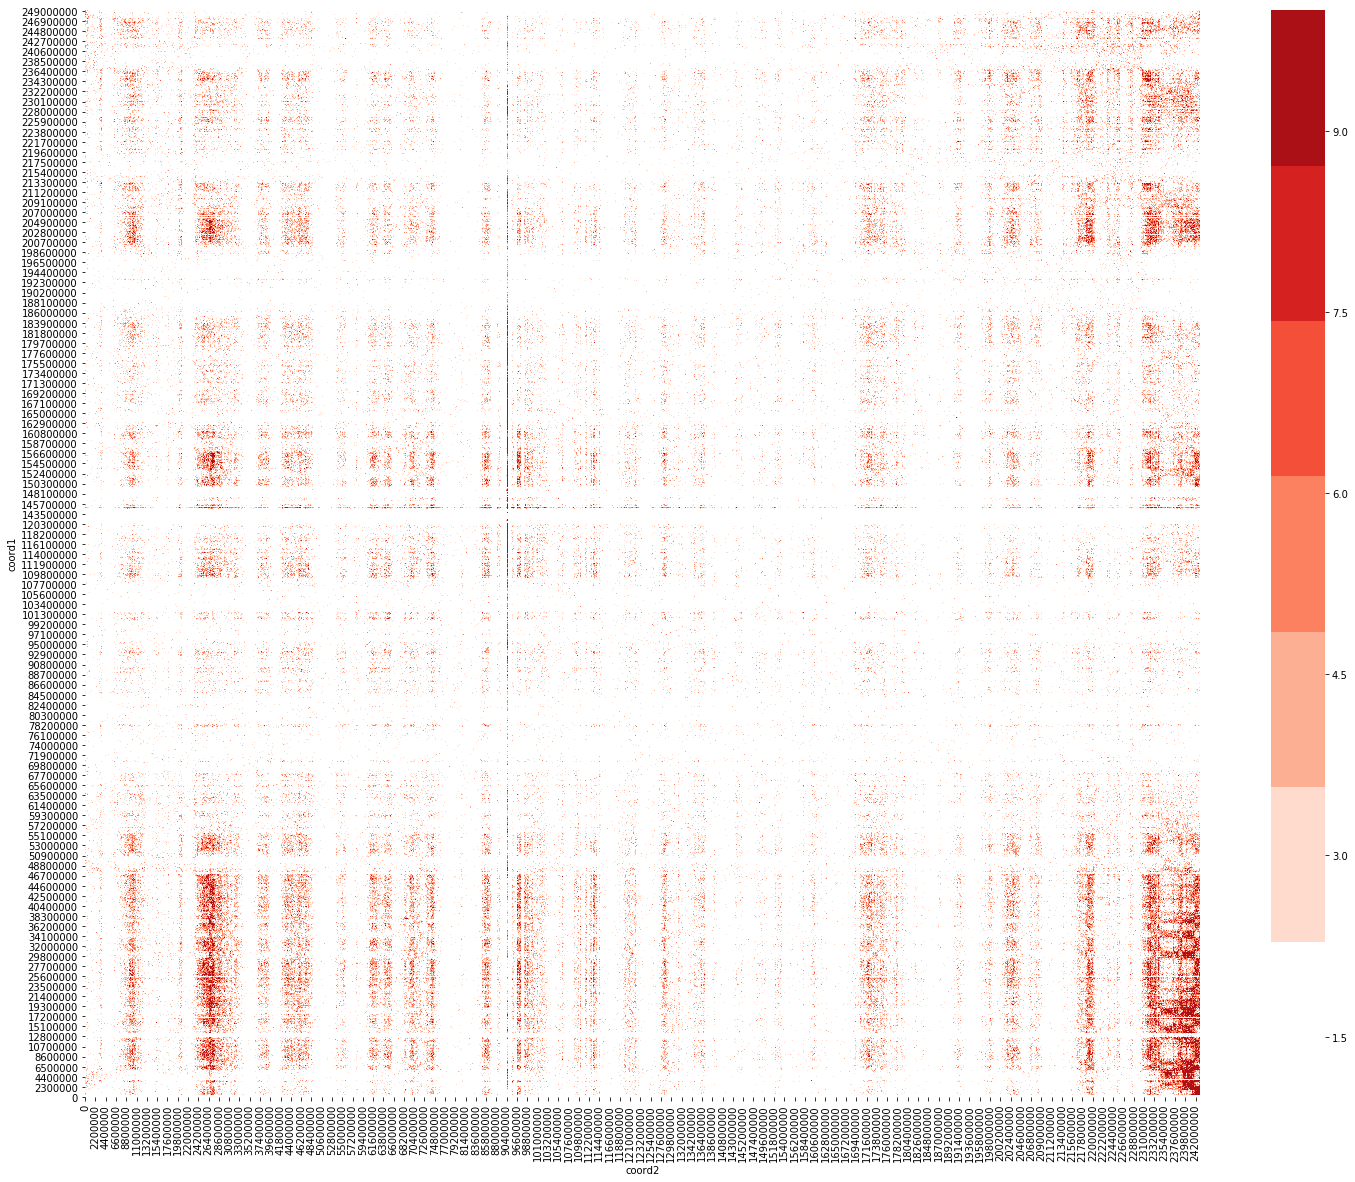

In [13]:
#raw data heatmap

fig, x = plt.subplots(figsize=(25,20)) 
raw_matr_data = raw_data.pivot('coord1', 'coord2', 'value').fillna(0)
raw_heatmap = sns.heatmap(raw_matr_data, vmin = 1, vmax = 10, ax=x, cmap = ['white'] + sns.color_palette("Reds"))
raw_heatmap.invert_yaxis()
#ax.savefig('raw_data100kb_interchrom_subset_heatmap.pdf') not working


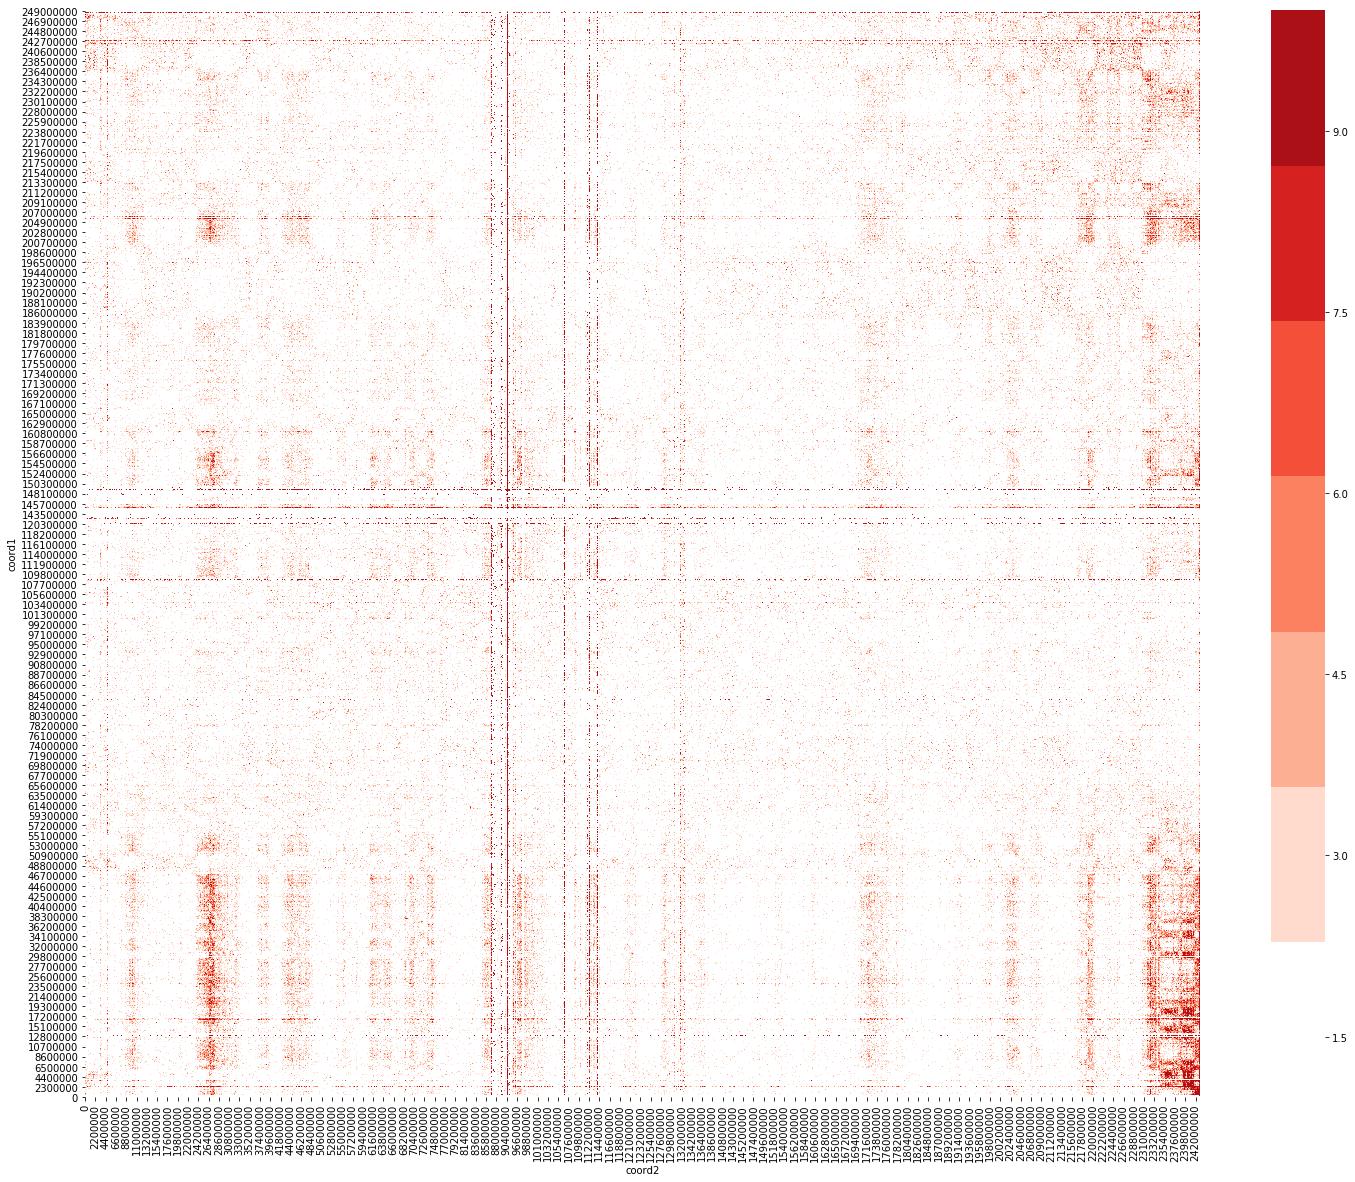

In [14]:
# KR normalized data heatmap
fig, x = plt.subplots(figsize=(25,20)) 
KRnorm_matr_data = KRnorm_data.pivot('coord1', 'coord2', 'value').fillna(0)
KR_heatmap = sns.heatmap(KRnorm_matr_data, vmin = 1, vmax = 10, ax = x, cmap = ['white'] + sns.color_palette("Reds"))
KR_heatmap.invert_yaxis()
#plt.savefig('KRnorm_data100kb_interchrom_subset_heatmap.pdf') not working

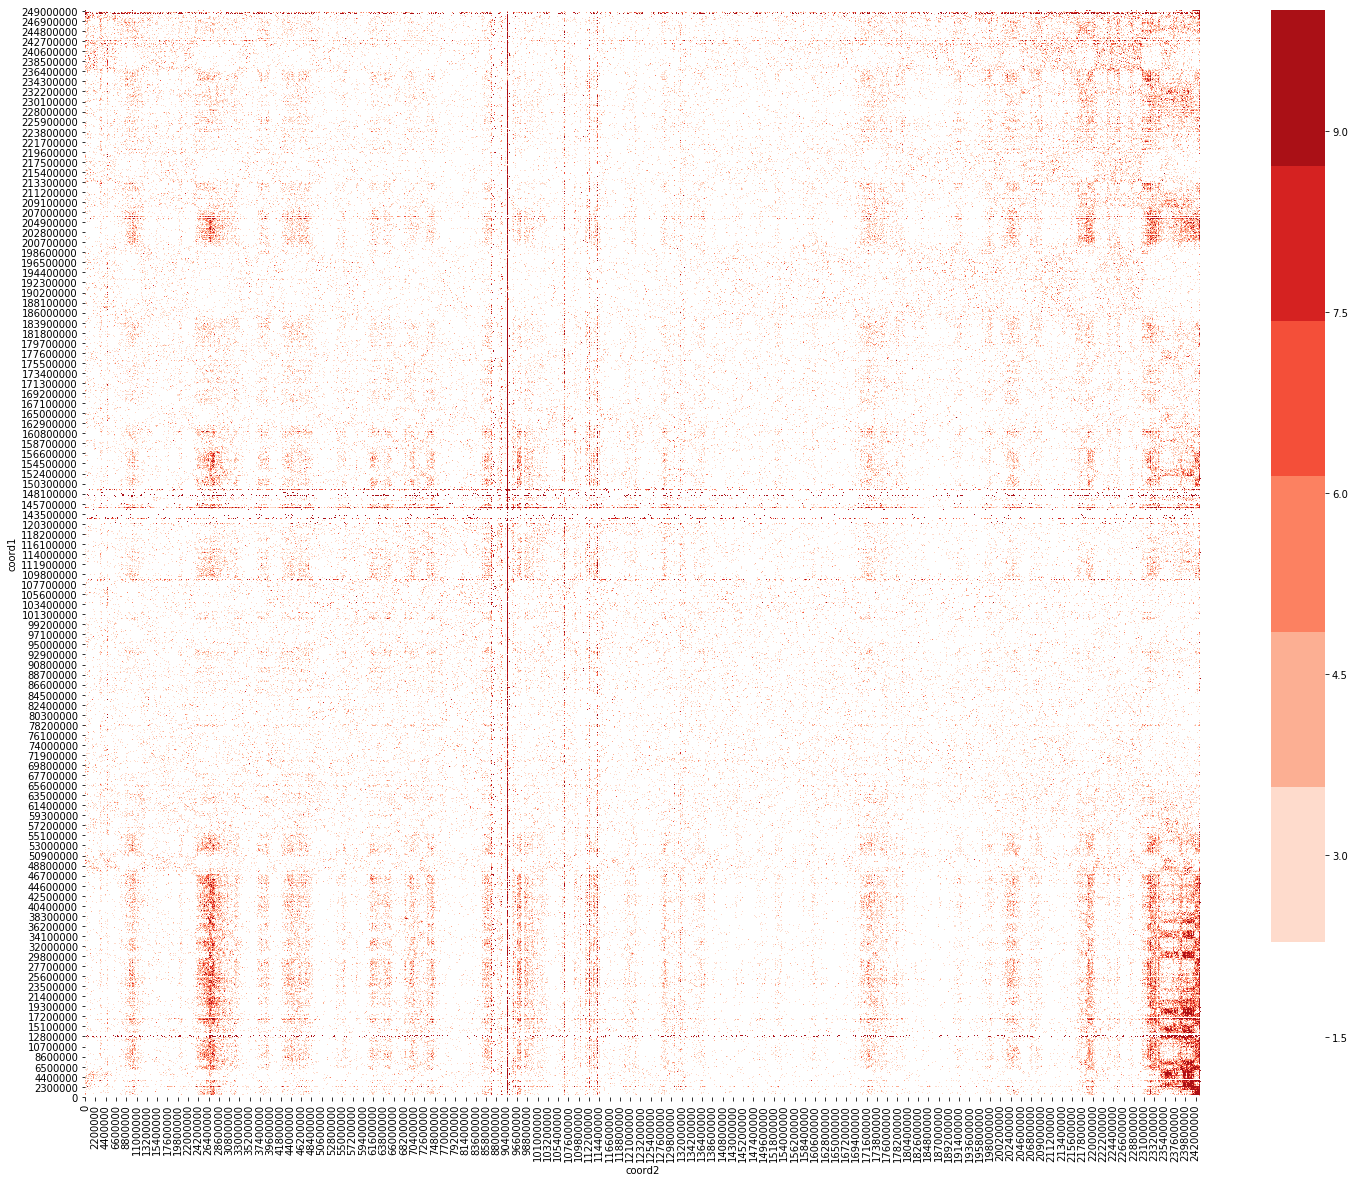

In [18]:
#SQRTVC normalized subset heatmap
fig, x = plt.subplots(figsize=(25,20)) 
SQRTVC_matr_data = SQRTVCnorm_data.pivot('coord1', 'coord2', 'value').fillna(0)
SQRTVC_heatmap = sns.heatmap(SQRTVC_matr_data, vmin = 1, vmax = 10, ax=x, cmap = ['white'] + sns.color_palette("Reds"))
SQRTVC_heatmap.invert_yaxis()

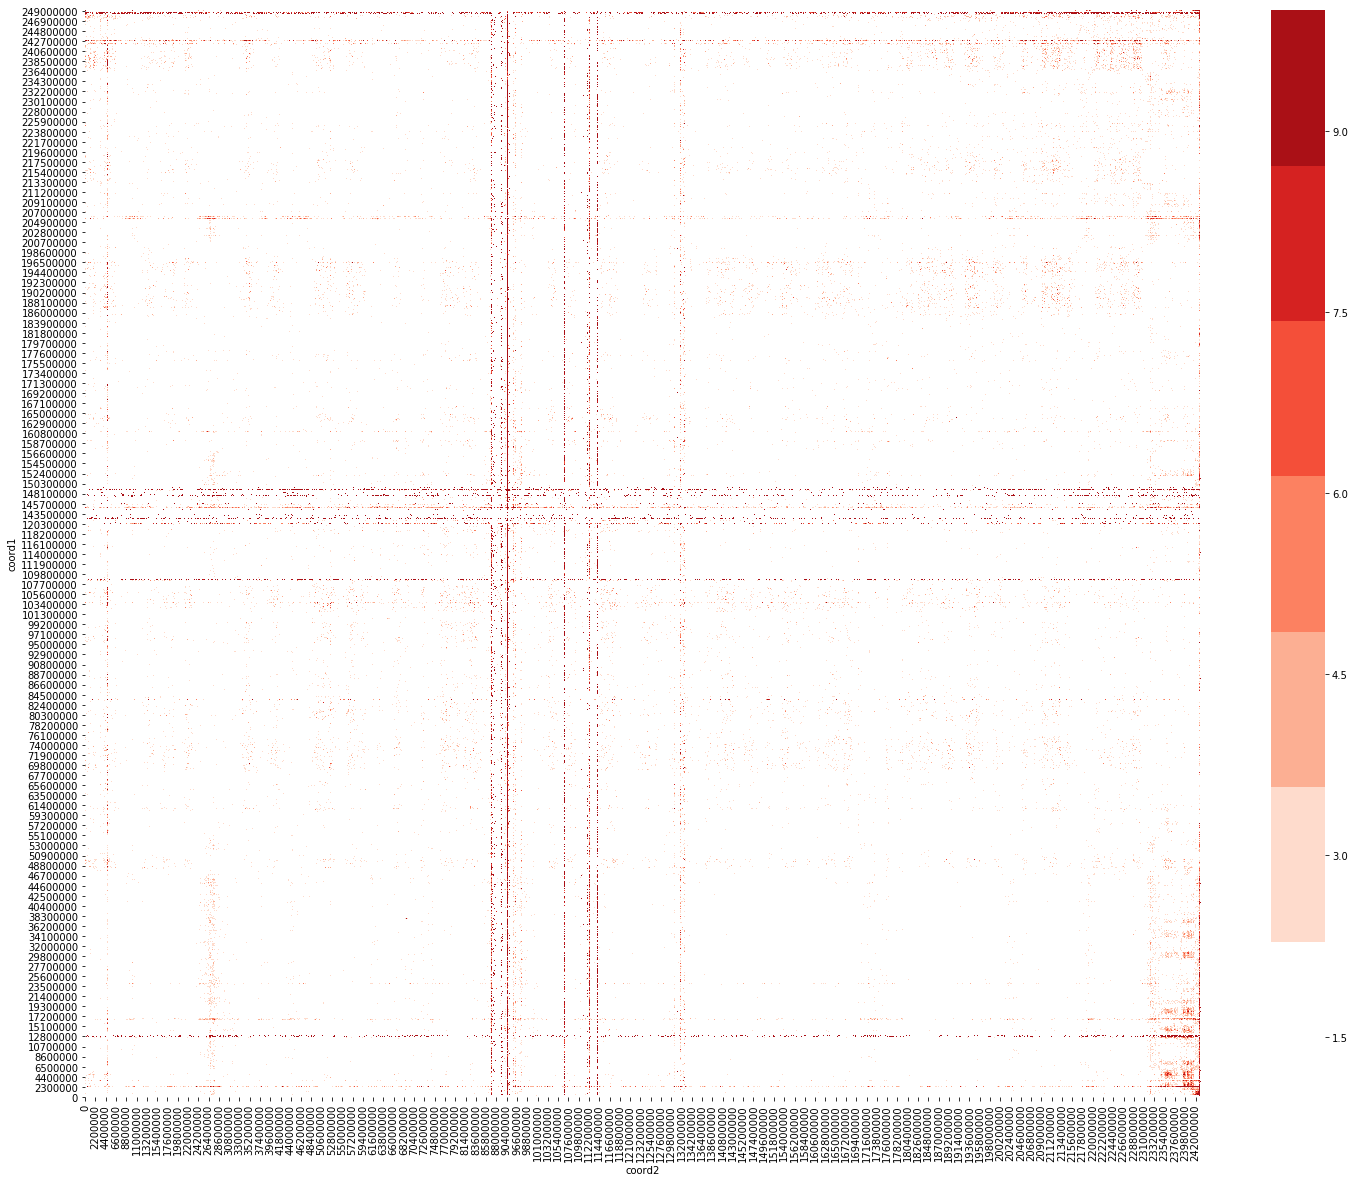

In [19]:
#VC normalized subset heatmap
fig, x = plt.subplots(figsize=(25,20)) 
VC_matr_data = VCnorm_data.pivot('coord1', 'coord2', 'value').fillna(0)
VC_heatmap = sns.heatmap(VC_matr_data, vmin = 1, vmax = 10, ax=x, cmap = ['white'] + sns.color_palette("Reds"))
VC_heatmap.invert_yaxis()

In [14]:
raw_subset.insert(0, 'ID', range(0, len(raw_subset)))

In [33]:
len(raw_subset)

28708

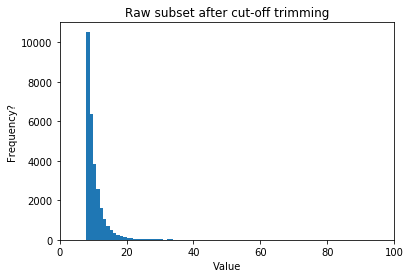

In [30]:
plt.hist(raw_subset.value, raw_subset.ID)
plt.axis([0, 100, 0, 11000])
plt.xlabel('Value')
plt.ylabel('Frequency?')
plt.title('Raw subset after cut-off trimming')
plt.show()
#plt.figure(figsize=(10, 30))

In [31]:
KRnorm_subset.insert(0, 'ID', range(0, len(KRnorm_subset)))

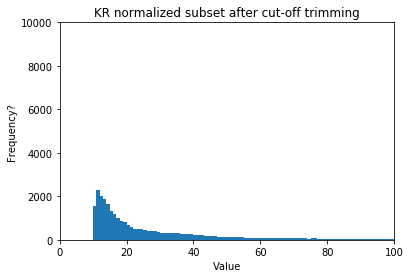

In [32]:
plt.hist(KRnorm_subset.value, raw_subset.ID)
plt.axis([0, 100, 0, 10000])
plt.xlabel('Value')
plt.ylabel('Frequency?')
plt.title('KR normalized subset after cut-off trimming')
plt.show()